<div class='alert alert-info' style='font-family:Arial; font-size:16px' ><center><font size="5"> AoU Heat Exposure and Sleep Analysis for Review </font></center></div>

Author: Jiawen Liao, PhD. University of Southern California, Keck School of Medicine <br/>
Email: liaojiaw@usc.edu <br/>

*Note: just for review only and data mergeing and covariates processing are not shown due to data use aggreement reason with AoURP. Full code will be published on the Researcher Workbench for AoURP Approved Reserachers to replicate the analysis and plot the results.<br/>*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-saved-data-for-regression" data-toc-modified-id="Load-the-saved-data-for-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the saved data for regression</a></span></li><li><span><a href="#Summary-of-TA-and-HW" data-toc-modified-id="Summary-of-TA-and-HW-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary of TA and HW</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#DTA-and-NTA-analysis" data-toc-modified-id="DTA-and-NTA-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DTA and NTA analysis</a></span></li><li><span><a href="#NHW-and-DHW-analysis" data-toc-modified-id="NHW-and-DHW-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>NHW and DHW analysis</a></span></li><li><span><a href="#Interaction-model" data-toc-modified-id="Interaction-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Interaction model</a></span></li><li><span><a href="#Stratify-model-by-covariates" data-toc-modified-id="Stratify-model-by-covariates-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Stratify model by covariates</a></span></li><li><span><a href="#Showing-Results-and-Write-CSV-for-Exports" data-toc-modified-id="Showing-Results-and-Write-CSV-for-Exports-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Showing Results and Write CSV for Exports</a></span><ul class="toc-item"><li><span><a href="#Interaction" data-toc-modified-id="Interaction-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Interaction</a></span></li><li><span><a href="#Stratify" data-toc-modified-id="Stratify-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Stratify</a></span></li></ul></li><li><span><a href="#Marine-Climate-Zone-Specific-Analysis" data-toc-modified-id="Marine-Climate-Zone-Specific-Analysis-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Marine Climate Zone Specific Analysis</a></span></li><li><span><a href="#Cliamte-Zone-and-Month-two-way-Stratify" data-toc-modified-id="Cliamte-Zone-and-Month-two-way-Stratify-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Cliamte Zone and Month two-way Stratify</a></span></li></ul></li><li><span><a href="#Disease-Stratification-and-Interaction-Analysis" data-toc-modified-id="Disease-Stratification-and-Interaction-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Disease Stratification and Interaction Analysis</a></span><ul class="toc-item"><li><span><a href="#Strata-by-CVD" data-toc-modified-id="Strata-by-CVD-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Strata by CVD</a></span></li><li><span><a href="#By-Obesity" data-toc-modified-id="By-Obesity-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>By Obesity</a></span></li><li><span><a href="#By-Diabetes" data-toc-modified-id="By-Diabetes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>By Diabetes</a></span></li><li><span><a href="#By-Depressive-disorder" data-toc-modified-id="By-Depressive-disorder-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>By Depressive disorder</a></span></li><li><span><a href="#By-Cancer" data-toc-modified-id="By-Cancer-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>By Cancer</a></span></li><li><span><a href="#Insomnia" data-toc-modified-id="Insomnia-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Insomnia</a></span></li><li><span><a href="#Sleep-Apnea" data-toc-modified-id="Sleep-Apnea-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Sleep Apnea</a></span></li></ul></li></ul></div>

In [ ]:
## Set up and load libraries
library(data.table)
library(lubridate)
library(plyr)
library(sf)
library(ggplot2)
library(stringi)
# library(geojsonio)
library(bigrquery)
library(tidyverse)
library(lubridate)
library(ggplot2)

##
#if (!require(devtools)) install.packages("devtools")
# if (!"ggvenn" %in% installed.packages()[,"Package"]) devtools::install_github("yanlinlin82/ggvenn")
library(ggvenn)

##
# ls_pkgs <- c("mgsub", "reshape2", "stringr")
# uninstalled_pkgs <- ls_pkgs[!(ls_pkgs %in% installed.packages()[,"Package"])]
# if(length(uninstalled_pkgs)) install.packages(uninstalled_pkgs)
library(mgsub)
library(reshape2)
library(stringr)
library(stringi)
library(DT)
library(lme4)

library(plm) #using this
library(Hmisc)


# Load the saved data for regression
Based on single run, using a loop to ge the estimates. This requires around 100G RAM
Less than 80 Ram, Kernel will die sometimes.
<br> Can start from here.

In [4]:
rm(list= ls())

In [4]:
#getting data function and CDR dataset location
download_data <- function(query){
    tb <- bq_project_query(Sys.getenv('GOOGLE_PROJECT'), query)
    bq_table_download(tb,bigint = "integer64")
}
dataset <- Sys.getenv('WORKSPACE_CDR')
DATASET = Sys.getenv('WORKSPACE_CDR')
dataset
my_bucket <- Sys.getenv("WORKSPACE_BUCKET")

read_bucket <- function (export_path)
{
    col_types <- NULL
    bind_rows(map(system2("gsutil", args = c("ls", export_path),
        stdout = TRUE, stderr = TRUE), function(csv) {
        message(str_glue("Loading {csv}."))
        chunk <- read_csv(pipe(str_glue("gsutil cat {csv}")),
            col_types = col_types, show_col_types = FALSE)
        if (is.null(col_types)) {
            col_types <- spec(chunk)
        }
        chunk
    }))
}

save_bucket = function(file, save_path = "/temp/", filename = 'saved_file.csv' ){
    
    # This snippet assumes that you run setup first

# This code saves your dataframe into a csv file in a "data" folder in Google Bucket

# Replace df with THE NAME OF YOUR DATAFRAME
my_dataframe <- file

# Replace 'test.csv' with THE NAME of the file you're going to store in the bucket (don't delete the quotation marks)
destination_filename <- filename
full_path = paste0(save_path,"/",filename)
########################################################################
##
################# DON'T CHANGE FROM HERE ###############################
##
########################################################################

# store the dataframe in current workspace
write_excel_csv(my_dataframe, destination_filename)

# Get the bucket name
my_bucket <- Sys.getenv('WORKSPACE_BUCKET')

# Copy the file from current workspace to the bucket
system(paste0("gsutil cp ./", destination_filename, " ", my_bucket, full_path), intern=T)

# Check if file is in the bucket
system(paste0("gsutil ls ", my_bucket, save_path,"/*.csv"), intern=T)

    
}


[1] "fc-aou-cdr-prod-ct.C2022Q4R13"

In [5]:
#load the saved data
sleep_summary = readRDS("../temp/sleep_summary4_heatwave_GT_v3.rds")

ls()

[1] "dataset"       "DATASET"       "download_data" "my_bucket"    
[5] "old_bucket"    "read_bucket"   "save_bucket"   "sleep_summary"
[9] "ZIP3_climate"

In [6]:
#load the last observation data and quality check
sleep_summary_fob = readRDS("../temp/sleep_summary_fob_for_covariates_heatwave_GT_v2.rds")
sleep_summary_fob = sleep_summary_fob[age_monitor_start>18 & !is.na(tmmn_anomaly) & !is.na(deprivation_index) & 
                                      sleep_tracking_days > 3*30,]

sleep_summary = sleep_summary[person_id %in% sleep_summary_fob$person_id ,]


dim(sleep_summary)


[1] 12531510      122

In [8]:
tb1 <- summaryM( age_baseline + age_monitor_start+monitor_year+sex2+ race2+ ethnicity2 + education2 + marital2 +
                Income2 + Employment2  + Smoking2 + Alcohol2 + homeownership + stress +median_income+ 
                deprivation_index+ age_baseline_cat + BA_Climate2 ~ age_baseline_cat, data= sleep_summary_fob, test=TRUE)

out_all <- html(tb1, caption='',
     exclude1=F, npct='numerator', pctdig=3,long=T,digits = 3,
     prmsd=TRUE, brmsd=FALSE, longtable=T, middle.bold=T, vnames = c('names'))
IRdisplay::display_html(out_all)


. 
 
 N 
 < 40 N=4184 
 [40, 50) N=2359 
 [50, 65) N=4453 
 >= 65 N=3236 
 Test Statistic 
 
 
 
 
 age_baseline 
 14232 
 27.00 32.00 35.00   (31.03 ± 5.19) 
 42.00 45.00 47.00   (44.64 ± 2.96) 
 54.00 58.00 61.00   (57.32 ± 4.29) 
 67.00 70.00 73.00   (70.53 ± 4.63) 
 F 3 14228 =61101, P<0.001 1 
 
 
 age_monitor_start 
 14232 
 25.49 29.56 33.51   (29.45 ± 5.29) 
 39.70 42.54 45.53   (42.52 ± 4.03) 
 51.35 55.32 58.89   (55.14 ± 5.04) 
 64.53 67.55 71.22   (68.15 ± 5.20) 
 F 3 14228 =44045, P<0.001 1 
 
 
 monitor_year 
 13413 
 1.92 3.55 5.59   (3.85 ±2.32) 
 2.30 4.35 6.28   (4.36 ±2.46) 
 2.51 4.58 6.53   (4.62 ±2.50) 
 2.67 4.77 6.57   (4.72 ±2.47) 
 F 3 13409 =91.8, P<0.001 1 
 
 
 sex2 
 14232 
 
 
 
 
 χ 2 6 =324, P<0.001 2 
 
 
     Male 
 
 0.239 ( 998) 
 0.227 ( 536) 
 0.284 (1263) 
 0.407 (1317) 
 
 
 
     Female 
 
 0.735 (3075) 
 0.743 (1752) 
 0.690 (3071) 
 0.562 (1820) 
 
 
 
     Other or Not Reported 
 
 0.027 ( 111) 
 0.030 ( 71) 
 0.027 ( 119) 
 0.031 ( 99) 
 
 
 
 race2 
 14232 
 
 
 
 
 χ 2 12 =396, P<0.001 2 
 
 
     White 
 
 0.768 (3212) 
 0.760 (1793) 
 0.838 (3730) 
 0.884 (2860) 
 
 
 
     Asian 
 
 0.056 ( 233) 
 0.028 ( 65) 
 0.021 ( 92) 
 0.014 ( 46) 
 
 
 
     Black or African American 
 
 0.038 ( 159) 
 0.079 ( 186) 
 0.055 ( 247) 
 0.037 ( 119) 
 
 
 
     Other 
 
 0.054 ( 224) 
 0.042 ( 100) 
 0.021 ( 95) 
 0.014 ( 45) 
 
 
 
     Not Reported 
 
 0.085 ( 356) 
 0.091 ( 215) 
 0.065 ( 289) 
 0.051 ( 166) 
 
 
 
 ethnicity2 
 14232 
 
 
 
 
 χ 2 6 =253, P<0.001 2 
 
 
     Not Hispanic or Latino 
 
 0.865 (3620) 
 0.879 (2073) 
 0.916 (4080) 
 0.935 (3027) 
 
 
 
     Hispanic or Latino 
 
 0.100 ( 420) 
 0.082 ( 193) 
 0.044 ( 198) 
 0.019 ( 62) 
 
 
 
     Not Reported/Other 
 
 0.034 ( 144) 
 0.039 ( 93) 
 0.039 ( 175) 
 0.045 ( 147) 
 
 
 
 education2 
 14232 
 
 
 
 
 χ 2 9 =101, P<0.001 2 
 
 
     Highest Grade: Advanced Degree 
 
 0.351 (1468) 
 0.372 ( 878) 
 0.362 (1610) 
 0.436 (1411) 
 
 
 
     Highest Grade: College Graduate 
 
 0.367 (1537) 
 0.315 ( 743) 
 0.319 (1421) 
 0.297 ( 962) 
 
 
 
     High School/College not completed 
 
 0.253 (1057) 
 0.278 ( 655) 
 0.292 (1301) 
 0.237 ( 766) 
 
 
 
     Not Reported 
 
 0.029 ( 122) 
 0.035 ( 83) 
 0.027 ( 121) 
 0.030 ( 97) 
 
 
 
 marital2 
 14232 
 
 
 
 
 χ 2 6 =336, P<0.001 2 
 
 
     Married or with partner 
 
 0.544 (2277) 
 0.684 (1614) 
 0.699 (3111) 
 0.714 (2309) 
 
 
 
     Not Married or Widowed 
 
 0.425 (1777) 
 0.285 ( 673) 
 0.274 (1220) 
 0.257 ( 832) 
 
 
 
     Not Reported 
 
 0.031 ( 130) 
 0.031 ( 72) 
 0.027 ( 122) 
 0.029 ( 95) 
 
 
 
 Income2 
 14232 
 
 
 
 
 χ 2 15 =602, P<0.001 2 
 
 
     Above 150k 
 
 0.159 ( 666) 
 0.257 ( 606) 
 0.279 (1241) 
 0.184 ( 595) 
 
 
 
     100k - 150k 
 
 0.164 ( 688) 
 0.219 ( 517) 
 0.220 ( 981) 
 0.210 ( 678) 
 
 
 
     75k - 100k 
 
 0.133 ( 555) 
 0.140 ( 331) 
 0.142 ( 631) 
 0.168 ( 545) 
 
 
 
     35k - 75k 
 
 0.286 (1195) 
 0.198 ( 468) 
 0.191 ( 850) 
 0.262 ( 849) 
 
 
 
     Less than 35k 
 
 0.194 ( 813) 
 0.106 ( 250) 
 0.098 ( 438) 
 0.083 ( 268) 
 
 
 
     Not reported 
 
 0.064 ( 267) 
 0.079 ( 187) 
 0.070 ( 312) 
 0.093 ( 301) 
 
 
 
 Employment2 
 14232 
 
 
 
 
 χ 2 9 =6881, P<0.001 2 
 
 
     Employed 
 
 0.812 (3399) 
 0.825 (1946) 
 0.695 (3094) 
 0.251 ( 813) 
 
 
 
     Retired 
 
 0.001 ( 3) 
 0.008 ( 19) 
 0.154 ( 686) 
 0.695 (2250) 
 
 
 
     Student 
 
 0.069 ( 289) 
 0.011 ( 26) 
 0.003 ( 13) 
 0.002 ( 5) 
 
 
 
     Out of work/Other 
 
 0.118 ( 493) 
 0.156 ( 368) 
 0.148 ( 660) 
 0.052 ( 168) 
 
 
 
 Smoking2 
 14232 
 
 
 
 
 χ 2 6 =529, P<0.001 2 
 
 
     No 
 
 0.767 (3209) 
 0.635 (1497) 
 0.638 (2839) 
 0.532 (1721) 
 
 
 
     Yes 
 
 0.194 ( 812) 
 0.326 ( 768) 
 0.330 (1471) 
 0.440 (1425) 
 
 
 
     Other/Not reported 
 
 0.039 ( 163) 
 0.040 ( 94) 
 0.032 ( 143) 
 0.028 ( 90) 
 
 
 
 Alcohol2 
 14232 
 
 
 
 
 χ 2 6 =43.5, P<0.001 2 
 
 
     No 
 
 0.039 ( 162) 
 0.026 ( 61) 
 0.024 ( 108) 
 0.018 ( 57) 
 

In [9]:
#check sleep_summary data
table(sleep_summary[,.(head(BA_Climate2,  1)),by = person_id]$V1)



   Hot  Mixed   Cold Marine 
  3540   2371   7717    604 

In [10]:
tb1 <- summaryM( age_baseline + age_monitor_start+monitor_year+sex2+ race2+ ethnicity2 + education2 + marital2 +
                Income2 + Employment2  + Smoking2 + Alcohol2 + homeownership + stress +median_income+ 
                deprivation_index+ age_baseline_cat + BA_Climate2 ~ 1, data= sleep_summary_fob, test=TRUE)

out_all <- html(tb1, caption='',
     exclude1=F, npct='numerator', pctdig=3,long=T,digits = 3,
     prmsd=TRUE, brmsd=FALSE, longtable=T, middle.bold=T, vnames = c('names'))
IRdisplay::display_html(out_all)

Warning message in cor(x, rank(y)):
“the standard deviation is zero”
Warning message in cor(x, rank(y)):
“the standard deviation is zero”
Warning message in cor(x, rank(y)):
“the standard deviation is zero”
Warning message in cor(x, rank(y)):
“the standard deviation is zero”
Warning message in cor(x, rank(y)):
“the standard deviation is zero”


. 
 
 N 
 V1 N=14232 
 Test Statistic 
 
 
 
 
 age_baseline 
 14232 
 37.0 52.0 64.0   (50.5 ±15.6) 
 
 
 
 age_monitor_start 
 14232 
 34.9 49.5 61.2   (48.5 ±15.5) 
 
 
 
 monitor_year 
 13413 
 2.34 4.30 6.35   (4.38 ±2.46) 
 
 
 
 sex2 
 14232 
 
 
 
 
     Male 
 
 0.289 (4114) 
 
 
 
     Female 
 
 0.683 (9718) 
 
 
 
     Other or Not Reported 
 
 0.028 ( 400) 
 
 
 
 race2 
 14232 
 
 
 
 
     White 
 
 0.815 (11595) 
 
 
 
     Asian 
 
 0.031 ( 436) 
 
 
 
     Black or African American 
 
 0.050 ( 711) 
 
 
 
     Other 
 
 0.033 ( 464) 
 
 
 
     Not Reported 
 
 0.072 ( 1026) 
 
 
 
 ethnicity2 
 14232 
 
 
 
 
     Not Hispanic or Latino 
 
 0.899 (12800) 
 
 
 
     Hispanic or Latino 
 
 0.061 ( 873) 
 
 
 
     Not Reported/Other 
 
 0.039 ( 559) 
 
 
 
 education2 
 14232 
 
 
 
 
     Highest Grade: Advanced Degree 
 
 0.377 (5367) 
 
 
 
     Highest Grade: College Graduate 
 
 0.328 (4663) 
 
 
 
     High School/College not completed 
 
 0.266 (3779) 
 
 
 
     Not Reported 
 
 0.030 ( 423) 
 
 
 
 marital2 
 14232 
 
 
 
 
     Married or with partner 
 
 0.654 (9311) 
 
 
 
     Not Married or Widowed 
 
 0.316 (4502) 
 
 
 
     Not Reported 
 
 0.029 ( 419) 
 
 
 
 Income2 
 14232 
 
 
 
 
     Above 150k 
 
 0.218 (3108) 
 
 
 
     100k - 150k 
 
 0.201 (2864) 
 
 
 
     75k - 100k 
 
 0.145 (2062) 
 
 
 
     35k - 75k 
 
 0.236 (3362) 
 
 
 
     Less than 35k 
 
 0.124 (1769) 
 
 
 
     Not reported 
 
 0.075 (1067) 
 
 
 
 Employment2 
 14232 
 
 
 
 
     Employed 
 
 0.650 (9252) 
 
 
 
     Retired 
 
 0.208 (2958) 
 
 
 
     Student 
 
 0.023 ( 333) 
 
 
 
     Out of work/Other 
 
 0.119 (1689) 
 
 
 
 Smoking2 
 14232 
 
 
 
 
     No 
 
 0.651 (9266) 
 
 
 
     Yes 
 
 0.315 (4476) 
 
 
 
     Other/Not reported 
 
 0.034 ( 490) 
 
 
 
 Alcohol2 
 14232 
 
 
 
 
     No 
 
 0.027 ( 388) 
 
 
 
     Yes 
 
 0.953 (13565) 
 
 
 
     Other/Not reported 
 
 0.020 ( 279) 
 
 
 
 homeownership 
 14232 
 
 
 
 
     Own 
 
 0.677 (9642) 
 
 
 
     Rent 
 
 0.237 (3366) 
 
 
 
     Other/Not reported 
 
 0.086 (1224) 
 
 
 
 stress 
 14232 
 
 
 
 
     Almost Never/Never 
 
 0.221 (3144) 
 
 
 
     Faily Often/Very Often 
 
 0.184 (2620) 
 
 
 
     Other/Not reported 
 
 0.356 (5073) 
 
 
 
     Sometimes 
 
 0.239 (3395) 
 
 
 
 median_income 
 14232 
 55434 62176 75272   (67529 ±17598) 
 
 
 
 deprivation_index 
 14232 
 0.2720 0.2970 0.3397   (0.3043 ±0.0575) 
 
 
 
 age_baseline_cat 
 14232 
 
 
 
 
     < 40 
 
 0.294 (4184) 
 
 
 
     [40, 50) 
 
 0.166 (2359) 
 
 
 
     [50, 65) 
 
 0.313 (4453) 
 
 
 
     >= 65 
 
 0.227 (3236) 
 
 
 
 BA_Climate2 
 14232 
 
 
 
 
     Hot 
 
 0.249 (3540) 
 
 
 
     Mixed 
 
 0.167 (2371) 
 
 
 
     Cold 
 
 0.542 (7717) 
 
 
 
     Marine 
 
 0.042 ( 604) 
 
 
 
 
 a b c represent the lower quartile a , the median b , and the upper quartile c for continuous variables.  x ± s represents X  ± 1 SD.   N is the number of non-missing values. Numbers after proportions are frequencies. Tests used: 1 Wilcoxon test; 2 Pearson test .

In [12]:
length(unique(sleep_summary$person_id))
colnames(sleep_summary)


[1] 14232

[1] "zip3"                                            
  [2] "sleep_date"                                      
  [3] "person_id"                                       
  [4] "year_month"                                      
  [5] "is_main_sleep"                                   
  [6] "minute_in_bed"                                   
  [7] "minute_asleep"                                   
  [8] "minute_after_wakeup"                             
  [9] "minute_awake"                                    
 [10] "minute_restless"                                 
 [11] "minute_deep"                                     
 [12] "minute_light"                                    
 [13] "minute_rem"                                      
 [14] "minute_wake"                                     
 [15] "month"                                           
 [16] "year"                                            
 [17] "day_of_week"                                     
 [18] "birth_datetime"                                  
 [19] "current_age"                                     
 [20] "race"                                            
 [21] "gender"                                          
 [22] "ethnicity"                                       
 [23] "sex_at_birth"                                    
 [24] "death_date"                                      
 [25] "death_type_concept_id"                           
 [26] "fb_sleep_sdate"                                  
 [27] "fb_sleep_edate"                                  
 [28] "monitor_year"                                    
 [29] "deceased"                                        
 [30] "primary_consent_date"                            
 [31] "Alcohol: Alcohol Participant"                    
 [32] "Cigar Smoking: Cigar Smoke Participant"          
 [33] "Education Level: Highest Grade"                  
 [34] "Electronic Smoking: Electric Smoke Participant"  
 [35] "Employment: Employment Status"                   
 [36] "Home Own: Current Home Own"                      
 [37] "Hookah Smoking: Hookah Smoke Participant"        
 [38] "Income: Annual Income"                           
 [39] "Living Situation: How Many Living Years"         
 [40] "Marital Status: Current Marital Status"          
 [41] "Smokeless Tobacco: Smokeless Tobacco Participant"
 [42] "Smoking: 100 Cigs Lifetime"                      
 [43] "Employment2"                                     
 [44] "age_baseline"                                    
 [45] "SOL"                                             
 [46] "REML"                                            
 [47] "SE"                                              
 [48] "SO_time"                                         
 [49] "wake_number"                                     
 [50] "frag_number"                                     
 [51] "SOff_time"                                       
 [52] "last_level"                                      
 [53] "device"                                          
 [54] "device_filled_in"                                
 [55] "SO_time_minute"                                  
 [56] "zip3_as_string"                                  
 [57] "median_income"                                   
 [58] "deprivation_index"                               
 [59] "tmmn"                                            
 [60] "tmmx"                                            
 [61] "rmax"                                            
 [62] "rmin"                                            
 [63] "tmmx_anomaly"                                    
 [64] "tmmn_anomaly"                                    
 [65] "pr"                                              
 [66] "vs"                                              
 [67] "hw_max_75p_1D"                                   
 [68] "hw_max_90p_1D"                                   
 [69] "hw_max_95p_1D"                                   
 [70] "hw_max_99p_1D"                                   
 [71] "hw_ma

In [16]:
sleep_summary[,SO_time_minute := as.numeric(SO_time_minute)]
summary(sleep_summary$SO_time_minute)
class(sleep_summary$SO_time_minute)
sleep_summary = sleep_summary[minute_asleep < 24*60]




      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
-27415.000   -102.500    -44.500     -5.737     31.500   1428.000        266 

[1] "numeric"

In [18]:
#some further QC of sleep data

sleep_summary = sleep_summary[!is.na(SO_time_minute)]
nrow(sleep_summary)

[1] 12531204

In [20]:
sleep_summary = sleep_summary[SO_time_minute < 720  ,]
sleep_summary = sleep_summary[SO_time_minute > -720 , ]
nrow(sleep_summary)

[1] 12266690

In [21]:

colnames(sleep_summary)
dim(sleep_summary)
length(unique(sleep_summary$person_id))

[1] "zip3"                                            
  [2] "sleep_date"                                      
  [3] "person_id"                                       
  [4] "year_month"                                      
  [5] "is_main_sleep"                                   
  [6] "minute_in_bed"                                   
  [7] "minute_asleep"                                   
  [8] "minute_after_wakeup"                             
  [9] "minute_awake"                                    
 [10] "minute_restless"                                 
 [11] "minute_deep"                                     
 [12] "minute_light"                                    
 [13] "minute_rem"                                      
 [14] "minute_wake"                                     
 [15] "month"                                           
 [16] "year"                                            
 [17] "day_of_week"                                     
 [18] "birth_datetime"                                  
 [19] "current_age"                                     
 [20] "race"                                            
 [21] "gender"                                          
 [22] "ethnicity"                                       
 [23] "sex_at_birth"                                    
 [24] "death_date"                                      
 [25] "death_type_concept_id"                           
 [26] "fb_sleep_sdate"                                  
 [27] "fb_sleep_edate"                                  
 [28] "monitor_year"                                    
 [29] "deceased"                                        
 [30] "primary_consent_date"                            
 [31] "Alcohol: Alcohol Participant"                    
 [32] "Cigar Smoking: Cigar Smoke Participant"          
 [33] "Education Level: Highest Grade"                  
 [34] "Electronic Smoking: Electric Smoke Participant"  
 [35] "Employment: Employment Status"                   
 [36] "Home Own: Current Home Own"                      
 [37] "Hookah Smoking: Hookah Smoke Participant"        
 [38] "Income: Annual Income"                           
 [39] "Living Situation: How Many Living Years"         
 [40] "Marital Status: Current Marital Status"          
 [41] "Smokeless Tobacco: Smokeless Tobacco Participant"
 [42] "Smoking: 100 Cigs Lifetime"                      
 [43] "Employment2"                                     
 [44] "age_baseline"                                    
 [45] "SOL"                                             
 [46] "REML"                                            
 [47] "SE"                                              
 [48] "SO_time"                                         
 [49] "wake_number"                                     
 [50] "frag_number"                                     
 [51] "SOff_time"                                       
 [52] "last_level"                                      
 [53] "device"                                          
 [54] "device_filled_in"                                
 [55] "SO_time_minute"                                  
 [56] "zip3_as_string"                                  
 [57] "median_income"                                   
 [58] "deprivation_index"                               
 [59] "tmmn"                                            
 [60] "tmmx"                                            
 [61] "rmax"                                            
 [62] "rmin"                                            
 [63] "tmmx_anomaly"                                    
 [64] "tmmn_anomaly"                                    
 [65] "pr"                                              
 [66] "vs"                                              
 [67] "hw_max_75p_1D"                                   
 [68] "hw_max_90p_1D"                                   
 [69] "hw_max_95p_1D"                                   
 [70] "hw_max_99p_1D"                                   
 [71] "hw_ma

[1] 12266690      124

[1] 14224

In [23]:
sleep_summary[,DOY := factor(yday(sleep_date))]
colnames(sleep_summary)

[1] "zip3"                                            
  [2] "sleep_date"                                      
  [3] "person_id"                                       
  [4] "year_month"                                      
  [5] "is_main_sleep"                                   
  [6] "minute_in_bed"                                   
  [7] "minute_asleep"                                   
  [8] "minute_after_wakeup"                             
  [9] "minute_awake"                                    
 [10] "minute_restless"                                 
 [11] "minute_deep"                                     
 [12] "minute_light"                                    
 [13] "minute_rem"                                      
 [14] "minute_wake"                                     
 [15] "month"                                           
 [16] "year"                                            
 [17] "day_of_week"                                     
 [18] "birth_datetime"                                  
 [19] "current_age"                                     
 [20] "race"                                            
 [21] "gender"                                          
 [22] "ethnicity"                                       
 [23] "sex_at_birth"                                    
 [24] "death_date"                                      
 [25] "death_type_concept_id"                           
 [26] "fb_sleep_sdate"                                  
 [27] "fb_sleep_edate"                                  
 [28] "monitor_year"                                    
 [29] "deceased"                                        
 [30] "primary_consent_date"                            
 [31] "Alcohol: Alcohol Participant"                    
 [32] "Cigar Smoking: Cigar Smoke Participant"          
 [33] "Education Level: Highest Grade"                  
 [34] "Electronic Smoking: Electric Smoke Participant"  
 [35] "Employment: Employment Status"                   
 [36] "Home Own: Current Home Own"                      
 [37] "Hookah Smoking: Hookah Smoke Participant"        
 [38] "Income: Annual Income"                           
 [39] "Living Situation: How Many Living Years"         
 [40] "Marital Status: Current Marital Status"          
 [41] "Smokeless Tobacco: Smokeless Tobacco Participant"
 [42] "Smoking: 100 Cigs Lifetime"                      
 [43] "Employment2"                                     
 [44] "age_baseline"                                    
 [45] "SOL"                                             
 [46] "REML"                                            
 [47] "SE"                                              
 [48] "SO_time"                                         
 [49] "wake_number"                                     
 [50] "frag_number"                                     
 [51] "SOff_time"                                       
 [52] "last_level"                                      
 [53] "device"                                          
 [54] "device_filled_in"                                
 [55] "SO_time_minute"                                  
 [56] "zip3_as_string"                                  
 [57] "median_income"                                   
 [58] "deprivation_index"                               
 [59] "tmmn"                                            
 [60] "tmmx"                                            
 [61] "rmax"                                            
 [62] "rmin"                                            
 [63] "tmmx_anomaly"                                    
 [64] "tmmn_anomaly"                                    
 [65] "pr"                                              
 [66] "vs"                                              
 [67] "hw_max_75p_1D"                                   
 [68] "hw_max_90p_1D"                                   
 [69] "hw_max_95p_1D"                                   
 [70] "hw_max_99p_1D"                                   
 [71] "hw_ma

In [25]:
#create month-state for random effect
sleep_summary[,month_STATE := paste(month,STATE,sep = "_")]
table(sleep_summary$month_STATE)



  1_AL   1_AR   1_AZ   1_CA   1_CO   1_CT   1_DC   1_DE   1_FL   1_GA   1_IA 
 30012   1681  46962 137249  10145   4772   2322   1009  32981  37739   5243 
  1_ID   1_IL   1_IN   1_KS   1_KY   1_LA   1_MA   1_MD   1_ME   1_MI   1_MN 
  1826  87326   9593   3124   3379   5278  93164  15867   4058  74135  27660 
  1_MO   1_MS   1_MT   1_NC   1_ND   1_NE   1_NH   1_NJ   1_NM   1_NV   1_NY 
 10346   1427   1594  11760   2677   2537   6234   8743   4037   2177  35837 
  1_OH   1_OK   1_OR   1_PA   1_RI   1_SC   1_SD   1_TN   1_TX   1_UT   1_VA 
 10983   2024   6621 110773   1844   3653   1075   7229  38731   3291  14855 
  1_VT   1_WA   1_WI   1_WV   1_WY  10_AL  10_AR  10_AZ  10_CA  10_CO  10_CT 
   845  17525 132503   1074    603  26887   1527  42887 126114   9283   4298 
 10_DC  10_DE  10_FL  10_GA  10_IA  10_ID  10_IL  10_IN  10_KS  10_KY  10_LA 
  2162    845  30786  35778   4704   1591  80108   8868   2760   3103   4618 
 10_MA  10_MD  10_ME  10_MI  10_MN  10_MO  10_MS  10_MT  10_NC 

In [27]:
table(sleep_summary$device)
sleep_summary[device %in% c("Ace_Cla_For_R11_Sur_Ult"), device := "other"]
sleep_summary[,person_id_device := paste(person_id,device,sep = "_")]

colnames(sleep_summary)


Ace_Cla_For_R11_Sur_Ult                    Alta                   Blaze 
                  28026                  499176                  173037 
                 Charge                    Flex                 Inspire 
                3442318                  213726                  992631 
                  Ionic                    Luxe             MobileTrack 
                  83350                  296315                  439699 
           multi_device                     One                   Sense 
                 809606                   37279                  990114 
                  Versa                     Zip 
                2131300                    6351 

[1] "zip3"                                            
  [2] "sleep_date"                                      
  [3] "person_id"                                       
  [4] "year_month"                                      
  [5] "is_main_sleep"                                   
  [6] "minute_in_bed"                                   
  [7] "minute_asleep"                                   
  [8] "minute_after_wakeup"                             
  [9] "minute_awake"                                    
 [10] "minute_restless"                                 
 [11] "minute_deep"                                     
 [12] "minute_light"                                    
 [13] "minute_rem"                                      
 [14] "minute_wake"                                     
 [15] "month"                                           
 [16] "year"                                            
 [17] "day_of_week"                                     
 [18] "birth_datetime"                                  
 [19] "current_age"                                     
 [20] "race"                                            
 [21] "gender"                                          
 [22] "ethnicity"                                       
 [23] "sex_at_birth"                                    
 [24] "death_date"                                      
 [25] "death_type_concept_id"                           
 [26] "fb_sleep_sdate"                                  
 [27] "fb_sleep_edate"                                  
 [28] "monitor_year"                                    
 [29] "deceased"                                        
 [30] "primary_consent_date"                            
 [31] "Alcohol: Alcohol Participant"                    
 [32] "Cigar Smoking: Cigar Smoke Participant"          
 [33] "Education Level: Highest Grade"                  
 [34] "Electronic Smoking: Electric Smoke Participant"  
 [35] "Employment: Employment Status"                   
 [36] "Home Own: Current Home Own"                      
 [37] "Hookah Smoking: Hookah Smoke Participant"        
 [38] "Income: Annual Income"                           
 [39] "Living Situation: How Many Living Years"         
 [40] "Marital Status: Current Marital Status"          
 [41] "Smokeless Tobacco: Smokeless Tobacco Participant"
 [42] "Smoking: 100 Cigs Lifetime"                      
 [43] "Employment2"                                     
 [44] "age_baseline"                                    
 [45] "SOL"                                             
 [46] "REML"                                            
 [47] "SE"                                              
 [48] "SO_time"                                         
 [49] "wake_number"                                     
 [50] "frag_number"                                     
 [51] "SOff_time"                                       
 [52] "last_level"                                      
 [53] "device"                                          
 [54] "device_filled_in"                                
 [55] "SO_time_minute"                                  
 [56] "zip3_as_string"                                  
 [57] "median_income"                                   
 [58] "deprivation_index"                               
 [59] "tmmn"                                            
 [60] "tmmx"                                            
 [61] "rmax"                                            
 [62] "rmin"                                            
 [63] "tmmx_anomaly"                                    
 [64] "tmmn_anomaly"                                    
 [65] "pr"                                              
 [66] "vs"                                              
 [67] "hw_max_75p_1D"                                   
 [68] "hw_max_90p_1D"                                   
 [69] "hw_max_95p_1D"                                   
 [70] "hw_max_99p_1D"                                   
 [71] "hw_ma

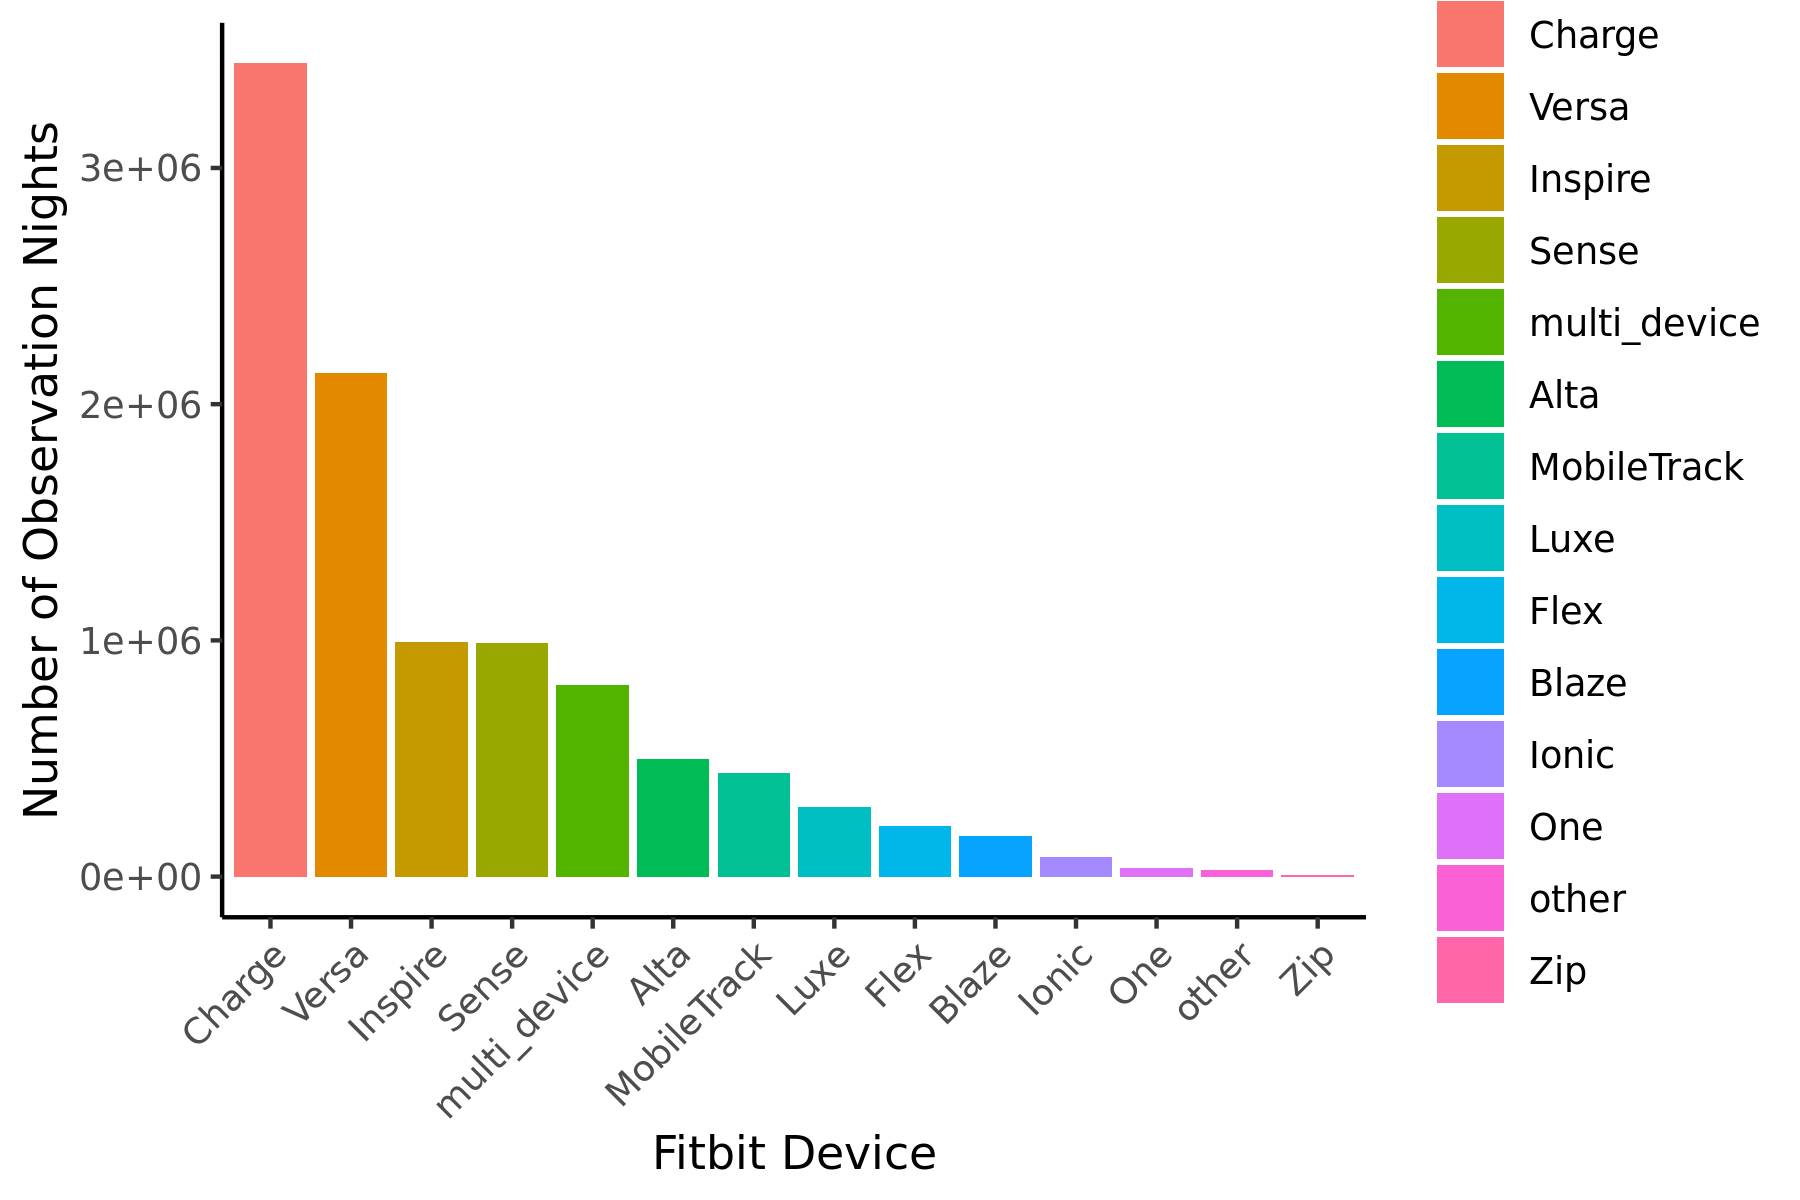

In [29]:
#bar plot
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)
device_summary[,`Fitbit Device` := factor(`Fitbit Device`,levels = rev(device_summary[order(Number),`Fitbit Device`]))]
ggplot(device_summary, aes(x=`Fitbit Device`, y=Number, fill=`Fitbit Device`)) +
        geom_bar(stat = "identity") +
        theme_classic()+
        labs(y = "Number of Observation Nights")+
        theme(axis.text.x = element_text(angle = 45,hjust = 1))


# Summary of TA and HW

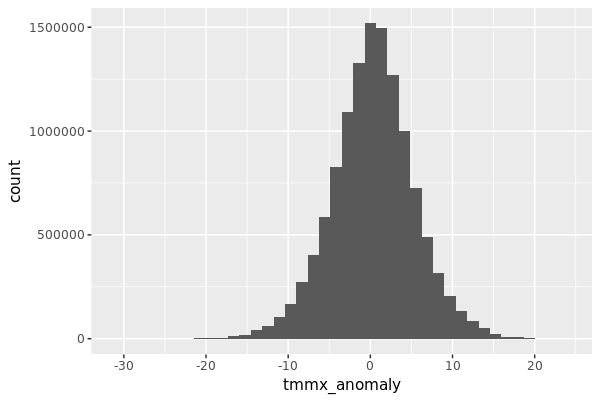

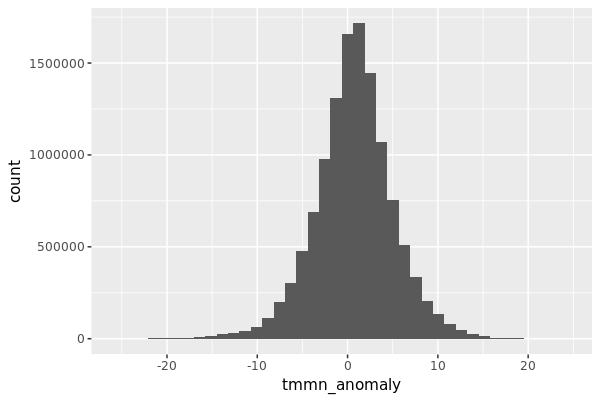

In [31]:
#histogram
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 100)
ggplot(data =sleep_summary,aes(x = tmmx_anomaly) )+
geom_histogram(bins = 40)

#histogram
ggplot(data =sleep_summary,aes(x = tmmn_anomaly) )+
geom_histogram(bins = 40)

In [33]:
TA_summary = sleep_summary[,.(DTA = mean(tmmx_anomaly),
                              NTA = mean(tmmn_anomaly)), by = c("year")][order(year)]
TA_summary

year,DTA,NTA
<dbl>,<dbl>,<dbl>
2010,0.49487213,0.4827586
2011,1.20275302,0.4415114
2012,2.32464480,0.9749827
2013,0.54911727,-0.2612516
2014,-0.58383190,-0.3817170
2015,0.62474175,1.0643806
2016,0.91156107,1.1144712
2017,0.62132405,0.9163846
2018,-0.01130311,0.6281826


In [35]:
#just by year
#max
heatwave_summary = sleep_summary[,.(N_total_days = .N,
                                    #max
                                    heatwave_max_75_1D_n = sum(hw_max_75p_1D),
                                    heatwave_max_75_2D_n = sum(hw_max_75p_2D),
                                    heatwave_max_75_3D_n = sum(hw_max_75p_3D),
                                    heatwave_max_75_4D_n = sum(hw_max_75p_4D),
                                    heatwave_max_90_1D_n = sum(hw_max_90p_1D),
                                    heatwave_max_90_2D_n = sum(hw_max_90p_2D),
                                    heatwave_max_90_3D_n = sum(hw_max_90p_3D),
                                    heatwave_max_90_4D_n = sum(hw_max_90p_4D),
                                    heatwave_max_95_1D_n = sum(hw_max_95p_1D),
                                    heatwave_max_95_2D_n = sum(hw_max_95p_2D),
                                    heatwave_max_95_3D_n = sum(hw_max_95p_3D),
                                    heatwave_max_95_4D_n = sum(hw_max_95p_4D),
                                    heatwave_max_99_1D_n = sum(hw_max_99p_1D),
                                    heatwave_max_99_2D_n = sum(hw_max_99p_2D),
                                    heatwave_max_99_3D_n = sum(hw_max_99p_3D),
                                    heatwave_max_99_4D_n = sum(hw_max_99p_4D),
                                    #min
                                    heatwave_min_75_1D_n = sum(hw_min_75p_1D),
                                    heatwave_min_75_2D_n = sum(hw_min_75p_2D),
                                    heatwave_min_75_3D_n = sum(hw_min_75p_3D),
                                    heatwave_min_75_4D_n = sum(hw_min_75p_4D),
                                    heatwave_min_90_1D_n = sum(hw_min_90p_1D),
                                    heatwave_min_90_2D_n = sum(hw_min_90p_2D),
                                    heatwave_min_90_3D_n = sum(hw_min_90p_3D),
                                    heatwave_min_90_4D_n = sum(hw_min_90p_4D),
                                    heatwave_min_95_1D_n = sum(hw_min_95p_1D),
                                    heatwave_min_95_2D_n = sum(hw_min_95p_2D),
                                    heatwave_min_95_3D_n = sum(hw_min_95p_3D),
                                    heatwave_min_95_4D_n = sum(hw_min_95p_4D),
                                    heatwave_min_99_1D_n = sum(hw_min_99p_1D),
                                    heatwave_min_99_2D_n = sum(hw_min_99p_2D),
                                    heatwave_min_99_3D_n = sum(hw_min_99p_3D),
                                    heatwave_min_99_4D_n = sum(hw_min_99p_4D),
                                    #compound hw
                                    hw_c_90p_3D_n = sum(hw_c_90p_3D)
                                    ), by = c("year")][order(year)]



In [36]:
options(repr.matrix.max.rows=50, repr.matrix.max.cols=42)
heatwave_summary

year,N_total_days,heatwave_max_75_1D_n,heatwave_max_75_2D_n,heatwave_max_75_3D_n,heatwave_max_75_4D_n,heatwave_max_90_1D_n,heatwave_max_90_2D_n,heatwave_max_90_3D_n,heatwave_max_90_4D_n,heatwave_max_95_1D_n,heatwave_max_95_2D_n,heatwave_max_95_3D_n,heatwave_max_95_4D_n,heatwave_max_99_1D_n,heatwave_max_99_2D_n,heatwave_max_99_3D_n,heatwave_max_99_4D_n,heatwave_min_75_1D_n,heatwave_min_75_2D_n,heatwave_min_75_3D_n,heatwave_min_75_4D_n,heatwave_min_90_1D_n,heatwave_min_90_2D_n,heatwave_min_90_3D_n,heatwave_min_90_4D_n,heatwave_min_95_1D_n,heatwave_min_95_2D_n,heatwave_min_95_3D_n,heatwave_min_95_4D_n,heatwave_min_99_1D_n,heatwave_min_99_2D_n,heatwave_min_99_3D_n,heatwave_min_99_4D_n,hw_c_90p_3D_n
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1845,642,609,581,555,313,271,222,194,157,119,96,67,22,16,9,0,627,612,598,585,331,310,274,214,189,158,124,88,43,21,7,4,149
2011,5289,1465,1424,1356,1266,696,637,577,472,426,384,319,250,142,109,78,53,1148,1101,1040,966,366,299,217,140,200,160,106,72,69,49,41,35,181
2012,19491,5967,5686,5426,4978,3230,3019,2664,2323,2100,1896,1646,1326,826,645,490,331,4371,4135,3891,3657,1693,1489,1204,1004,902,718,539,418,263,168,96,79,1064
2013,62011,17843,17031,16067,14743,7573,6679,5751,4952,4169,3495,3000,2474,1010,780,540,315,14695,14118,13177,12179,5671,4870,4159,3573,2848,2344,1834,1543,640,451,351,225,2912
2014,156802,34999,32402,29076,25277,8750,6794,4507,2890,3082,2067,1256,868,306,214,108,40,36987,35079,32654,30071,11596,9355,7067,5145,4765,3456,2118,1302,437,173,83,22,2555
2015,432395,111856,104439,96008,89224,37833,32684,26611,21371,16852,13090,8203,5051,1694,1056,639,226,125263,120571,113993,105957,48990,41771,35408,30689,23766,18144,13415,9945,3902,2035,1135,770,17135
2016,914206,245450,231846,216348,202059,99209,86411,68426,52932,42032,30439,20210,13591,5258,2974,736,137,250464,241455,229562,220439,106320,93674,81182,68430,51054,39303,29563,21381,8006,4373,2474,1981,39555
2017,1252703,290737,269945,249652,225075,93673,76196,62847,46190,39381,31887,26157,15908,6342,4664,2552,928,308193,294194,276331,255045,109096,91837,72972,60314,45600,34043,25089,19203,7562,4754,2989,1918,35588
2018,1612246,425688,396348,364944,339767,157488,136201,106581,82442,71249,55718,38163,24247,8846,5273,1336,359,463162,448284,429711,416924,193807,172712,152203,126351,98180,81824,62832,42804,17969,9007,4157,1006,74421


In [38]:
#by month and year and then plot
heatwave_summary = sleep_summary[,.(N_total_days = .N,
                                    #max
                                    heatwave_max_75_1D_n = sum(hw_max_75p_1D),
                                    heatwave_max_75_2D_n = sum(hw_max_75p_2D),
                                    heatwave_max_75_3D_n = sum(hw_max_75p_3D),
                                    heatwave_max_75_4D_n = sum(hw_max_75p_4D),
                                    heatwave_max_90_1D_n = sum(hw_max_90p_1D),
                                    heatwave_max_90_2D_n = sum(hw_max_90p_2D),
                                    heatwave_max_90_3D_n = sum(hw_max_90p_3D),
                                    heatwave_max_90_4D_n = sum(hw_max_90p_4D),
                                    heatwave_max_95_1D_n = sum(hw_max_95p_1D),
                                    heatwave_max_95_2D_n = sum(hw_max_95p_2D),
                                    heatwave_max_95_3D_n = sum(hw_max_95p_3D),
                                    heatwave_max_95_4D_n = sum(hw_max_95p_4D),
                                    heatwave_max_99_1D_n = sum(hw_max_99p_1D),
                                    heatwave_max_99_2D_n = sum(hw_max_99p_2D),
                                    heatwave_max_99_3D_n = sum(hw_max_99p_3D),
                                    heatwave_max_99_4D_n = sum(hw_max_99p_4D),
                                    #min
                                    heatwave_min_75_1D_n = sum(hw_min_75p_1D),
                                    heatwave_min_75_2D_n = sum(hw_min_75p_2D),
                                    heatwave_min_75_3D_n = sum(hw_min_75p_3D),
                                    heatwave_min_75_4D_n = sum(hw_min_75p_4D),
                                    heatwave_min_90_1D_n = sum(hw_min_90p_1D),
                                    heatwave_min_90_2D_n = sum(hw_min_90p_2D),
                                    heatwave_min_90_3D_n = sum(hw_min_90p_3D),
                                    heatwave_min_90_4D_n = sum(hw_min_90p_4D),
                                    heatwave_min_95_1D_n = sum(hw_min_95p_1D),
                                    heatwave_min_95_2D_n = sum(hw_min_95p_2D),
                                    heatwave_min_95_3D_n = sum(hw_min_95p_3D),
                                    heatwave_min_95_4D_n = sum(hw_min_95p_4D),
                                    heatwave_min_99_1D_n = sum(hw_min_99p_1D),
                                    heatwave_min_99_2D_n = sum(hw_min_99p_2D),
                                    heatwave_min_99_3D_n = sum(hw_min_99p_3D),
                                    heatwave_min_99_4D_n = sum(hw_min_99p_4D),
                                    hw_c_90p_3D_n = sum(hw_c_90p_3D)
                                   ), by = c("year","month")][order(year,month)]



In [39]:
options(repr.matrix.max.rows=30, repr.matrix.max.cols=42)
heatwave_summary

year,month,N_total_days,heatwave_max_75_1D_n,heatwave_max_75_2D_n,heatwave_max_75_3D_n,heatwave_max_75_4D_n,heatwave_max_90_1D_n,heatwave_max_90_2D_n,heatwave_max_90_3D_n,heatwave_max_90_4D_n,heatwave_max_95_1D_n,heatwave_max_95_2D_n,heatwave_max_95_3D_n,heatwave_max_95_4D_n,heatwave_max_99_1D_n,heatwave_max_99_2D_n,heatwave_max_99_3D_n,heatwave_max_99_4D_n,heatwave_min_75_1D_n,heatwave_min_75_2D_n,heatwave_min_75_3D_n,heatwave_min_75_4D_n,heatwave_min_90_1D_n,heatwave_min_90_2D_n,heatwave_min_90_3D_n,heatwave_min_90_4D_n,heatwave_min_95_1D_n,heatwave_min_95_2D_n,heatwave_min_95_3D_n,heatwave_min_95_4D_n,heatwave_min_99_1D_n,heatwave_min_99_2D_n,heatwave_min_99_3D_n,heatwave_min_99_4D_n,hw_c_90p_3D_n
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,2,104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,3,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,4,93,15,12,8,0,4,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,5,105,29,26,24,15,12,11,8,4,5,0,0,0,0,0,0,0,29,27,21,21,5,2,0,0,0,0,0,0,0,0,0,0,0
2010,6,194,141,132,128,125,48,35,24,24,18,14,10,7,2,0,0,0,159,157,155,152,70,62,42,12,21,12,6,3,3,0,0,0,15
2010,7,214,196,196,196,196,119,110,95,87,68,55,43,28,9,9,7,0,189,189,189,189,146,142,137,123,99,84,70,56,24,17,5,4,87
2010,8,194,164,163,159,159,79,72,60,52,36,29,23,14,5,5,2,0,167,167,167,167,92,91,88,75,61,57,45,29,15,4,2,0,45
2010,9,209,80,67,53,50,50,39,35,27,30,21,20,18,6,2,0,0,71,67,63,53,18,13,7,4,8,5,3,0,1,0,0,0,2


In [43]:
#check max and min HI heatwave overlaps
table(sleep_summary$hw_min_90p_3D,sleep_summary$hw_max_90p_3D)



   
           0        1
  0 11055469   267830
  1   459280   484111

# Regression

## DTA and NTA analysis

In [44]:
c_exp_list = c('tmmx_anomaly','tmmn_anomaly')
outcome_list = c('minute_asleep',"SE","WASO", "SO_time_minute",
                 'minute_deep','minute_light','minute_rem' )

#continuous outcome regression data_in
c_exp_data_in = cbind.data.frame(rep(c_exp_list,  length(outcome_list)), rep(outcome_list, each = length(c_exp_list)) )
colnames(c_exp_data_in) = c('c_variable_select','outcome')


In [45]:
#primary analysis
c_exp_data_in

c_variable_select,outcome
<chr>,<chr>
tmmx_anomaly,minute_asleep
tmmn_anomaly,minute_asleep
tmmx_anomaly,SE
tmmn_anomaly,SE
tmmx_anomaly,WASO
tmmn_anomaly,WASO
tmmx_anomaly,SO_time_minute
tmmn_anomaly,SO_time_minute
tmmx_anomaly,minute_deep


In [46]:
## Functions
#continuous exposure model
#revised in panel regression model (plm)
#main analysis: using random model here
c_exp_reg_save = function(c_variable_select,outcome){
    message("processing ",c_variable_select, ' and ',outcome )
    c_formula = paste(outcome, " ~ ",c_variable_select," + pr + rmax + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index" )
    message('runing models...') #device merge with person id
    ##run model model
        fit_c = plm(formula = as.formula(c_formula),index = c("person_id_device","month_STATE","sleep_date"),  #using person_id_device as random effects
                model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])  #try sleep_summary2, has some truncate
    continuous_results = as.data.table(coef(summary(fit_c)),keep.rownames = "exp")
    continuous_results[,model_type := "continuous_model"]
    
    out = continuous_results
    return(out)
}



In [49]:
#running models
c_exp_reg_daily = mdply(.data = c_exp_data_in, .fun = c_exp_reg_save, .progress= "text")



  |                                                                      |   0%

processing tmmx_anomaly and minute_asleep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=====                                                                 |   7%

processing tmmn_anomaly and minute_asleep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  14%

processing tmmx_anomaly and SE

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===============                                                       |  21%

processing tmmn_anomaly and SE

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================                                                  |  29%

processing tmmx_anomaly and WASO

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================                                             |  36%

processing tmmn_anomaly and WASO

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============================                                        |  43%

processing tmmx_anomaly and SO_time_minute

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

processing tmmn_anomaly and SO_time_minute

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================================                              |  57%

processing tmmx_anomaly and minute_deep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================================                         |  64%

processing tmmn_anomaly and minute_deep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================================================                    |  71%

processing tmmx_anomaly and minute_light

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=======================================================               |  79%

processing tmmn_anomaly and minute_light

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  86%

processing tmmx_anomaly and minute_rem

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=================================================================     |  93%

processing tmmn_anomaly and minute_rem

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [50]:

#V4: pre-submission results
#NTA, DTA primary and secondary analysis
saveRDS(c_exp_reg_daily, file = "../results/DTA_NTA_main_outcomes_v4.rds")



## NHW and DHW analysis

In [52]:
#version 4: presubmission final results primary and secondary outcomes
c_exp_list = c('hw_min_90p_3D','hw_max_90p_3D')
outcome_list = c('minute_asleep',"SE","WASO","SO_time_minute",'minute_light','minute_deep','minute_rem')
#V4: main outcomes pre-submission results
c_exp_data_in = cbind.data.frame(rep(c_exp_list,  length(outcome_list)), rep(outcome_list, each = length(c_exp_list)) )
colnames(c_exp_data_in) = c('c_variable_select','outcome')



In [53]:
#primary and secondary outcomes
c_exp_data_in
# c_exp_data_in2
# c_exp_data_in3
# c_exp_data_in3_sp


c_variable_select,outcome
<chr>,<chr>
hw_min_90p_3D,minute_asleep
hw_max_90p_3D,minute_asleep
hw_min_90p_3D,SE
hw_max_90p_3D,SE
hw_min_90p_3D,WASO
hw_max_90p_3D,WASO
hw_min_90p_3D,SO_time_minute
hw_max_90p_3D,SO_time_minute
hw_min_90p_3D,minute_light


In [54]:
## Functions
c_exp_reg_save = function(c_variable_select,outcome){
    message("processing ",c_variable_select, ' and ',outcome )
    #formula
    c_formula = paste(outcome, " ~ ",c_variable_select," + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean+ factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index" )
    message('runing models...')
    ##run model continuous centile model
    fit_c = plm(formula = as.formula(c_formula),index = c("person_id_device","month_STATE","sleep_date"),
                model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    continuous_results = as.data.table(coef(summary(fit_c)),keep.rownames = "exp")
    continuous_results[,model_type := "continuous_model"]
    
    out = continuous_results
    return(out)
}



In [55]:
#here only 90p_3D HW on primary and secondary outcomes (2024-12)

HW_90_sleep_outcomes = as.data.table(mdply(.data = c_exp_data_in, .fun = c_exp_reg_save, .progress= "text"))

  |                                                                      |   0%

processing hw_min_90p_3D and minute_asleep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=====                                                                 |   7%

processing hw_max_90p_3D and minute_asleep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  14%

processing hw_min_90p_3D and SE

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===============                                                       |  21%

processing hw_max_90p_3D and SE

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================                                                  |  29%

processing hw_min_90p_3D and WASO

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================                                             |  36%

processing hw_max_90p_3D and WASO

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============================                                        |  43%

processing hw_min_90p_3D and SO_time_minute

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

processing hw_max_90p_3D and SO_time_minute

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================================                              |  57%

processing hw_min_90p_3D and minute_light

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================================                         |  64%

processing hw_max_90p_3D and minute_light

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================================================                    |  71%

processing hw_min_90p_3D and minute_deep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=======================================================               |  79%

processing hw_max_90p_3D and minute_deep

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  86%

processing hw_min_90p_3D and minute_rem

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=================================================================     |  93%

processing hw_max_90p_3D and minute_rem

runing models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [56]:
#V4: presubmission results
saveRDS(HW_90_sleep_outcomes, file = "../results/heatwave/GT_90p_3D_hw_v4.rds")


character(0)

## Interaction model

In [42]:
#Functions
c_exp_int_model_ta = function(c_variable_select,int_var){
    message("processing ",c_variable_select, ' and interaction with ',int_var )
    #cov_list = " +  rmax +  prcp_deviation  + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean+ factor(day_of_week)+factor(year)   + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula), 
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,interaction_var := int_var]
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula), 
                           index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,interaction_var := int_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula),
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,interaction_var := int_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ",  c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,interaction_var := int_var]

    
    
    all_results = rbindlist(list(minute_asleep_results,minute_light_results,minute_deep_results,minute_rem_results))
    
    return(all_results)

    
}

c_exp_int_model_hw = function(c_variable_select,int_var){
    message("processing ",c_variable_select, ' and interaction with ',int_var )
    #cov_list = " +  rmax +  prcp_deviation  + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean+ factor(day_of_week)+factor(year)   + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula), 
                            index = c("person_id_device","month_STATE","sleep_date"), 
                            #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,interaction_var := int_var]
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula), 
                           index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,interaction_var := int_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula),
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,interaction_var := int_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ",  c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,interaction_var := int_var]
    
    all_results = rbindlist(list(minute_asleep_results,minute_light_results,minute_deep_results,minute_rem_results))
    
    return(all_results)

    
}


In [44]:
#a loop to run through all exp and outcomes

#updated for this list for simplicity
c_variable_hw = c( 'hw_min_90p_3D','hw_max_90p_3D') #'hw_max_90p_1D','hw_max_90p_3D','hw_max_99p_1D','hw_max_99p_3D'
c_variable_ta = c( 'tmmx_anomaly','tmmn_anomaly') 

# covariates
stra_list = c("month","BA_Climate2","race2","sex2","ethnicity2","education2","Income2","Employment2",
                  "age_baseline_cat","marital2","homeownership"  )


data_in_hw = cbind.data.frame(rep(c_variable_hw,length(stra_list)), rep(stra_list,each = length(c_variable_hw))  )
colnames(data_in_hw) = c('c_variable_select','int_var')


data_in_ta = cbind.data.frame(rep(c_variable_ta,length(stra_list)), rep(stra_list,each = length(c_variable_ta))  )
colnames(data_in_ta) = c('c_variable_select','int_var')


In [45]:
data_in_hw 
data_in_ta

c_variable_select,int_var
<chr>,<chr>
hw_min_90p_3D,month
hw_max_90p_3D,month
hw_min_90p_3D,BA_Climate2
hw_max_90p_3D,BA_Climate2
hw_min_90p_3D,race2
hw_max_90p_3D,race2
hw_min_90p_3D,sex2
hw_max_90p_3D,sex2
hw_min_90p_3D,ethnicity2


c_variable_select,int_var
<chr>,<chr>
tmmx_anomaly,month
tmmn_anomaly,month
tmmx_anomaly,BA_Climate2
tmmn_anomaly,BA_Climate2
tmmx_anomaly,race2
tmmn_anomaly,race2
tmmx_anomaly,sex2
tmmn_anomaly,sex2
tmmx_anomaly,ethnicity2


In [46]:
HW_int_analysis = as.data.table(mdply(.data = data_in_hw, .fun = c_exp_int_model_hw, .progress = "text"))


  |                                                                      |   0%

processing hw_min_90p_3D and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===                                                                   |   5%

processing hw_max_90p_3D and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======                                                                |   9%

processing hw_min_90p_3D and interaction with BA_Climate2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  14%

processing hw_max_90p_3D and interaction with BA_Climate2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============                                                         |  18%

processing hw_min_90p_3D and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================                                                      |  23%

processing hw_max_90p_3D and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================                                                   |  27%

processing hw_min_90p_3D and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================                                                |  32%

processing hw_max_90p_3D and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================                                             |  36%

processing hw_min_90p_3D and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================                                         |  41%

processing hw_max_90p_3D and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

processing hw_min_90p_3D and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

processing hw_max_90p_3D and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

processing hw_min_90p_3D and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================                             |  59%

processing hw_max_90p_3D and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================================                         |  64%

processing hw_min_90p_3D and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================                      |  68%

processing hw_max_90p_3D and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================                   |  73%

processing hw_min_90p_3D and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================                |  77%

processing hw_max_90p_3D and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================================             |  82%

processing hw_min_90p_3D and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  86%

processing hw_max_90p_3D and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================================      |  91%

processing hw_min_90p_3D and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================================   |  95%

processing hw_max_90p_3D and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [47]:
#HW interactions results
HW_int_analysis
saveRDS(HW_int_analysis, file = "../results/heatwave/HW_int_analysis_v4_1.rds")



[1] 1698   10

c_variable_select,int_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,interaction_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,month,hw_min_90p_3D,-2.9004547,0.6861986,-4.226844,2.369952e-05,hw_min_90p_3D,minute_asleep,month
hw_min_90p_3D,month,factor(month)6,-4.1305800,0.1221936,-33.803563,1.845076e-250,hw_min_90p_3D,minute_asleep,month
hw_min_90p_3D,month,factor(month)7,-2.9662005,0.1458430,-20.338315,5.933877e-92,hw_min_90p_3D,minute_asleep,month
hw_min_90p_3D,month,factor(month)8,-1.1376307,0.1403314,-8.106742,5.200482e-16,hw_min_90p_3D,minute_asleep,month
hw_min_90p_3D,month,factor(month)9,0.8548539,0.1282816,6.663885,2.667044e-11,hw_min_90p_3D,minute_asleep,month
hw_min_90p_3D,month,factor(month)10,2.5763947,0.1242825,20.730150,1.866327e-95,hw_min_90p_3D,minute_asleep,month


In [48]:
#TA interaction analysis

TA_int_analysis = as.data.table(mdply(.data = data_in_ta, .fun = c_exp_int_model_ta, .progress = "text"))

saveRDS(TA_int_analysis, file = "../results/TA_int_analysis_v4_1.rds")


  |                                                                      |   0%

processing tmmx_anomaly and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===                                                                   |   5%

processing tmmn_anomaly and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======                                                                |   9%

processing tmmx_anomaly and interaction with BA_Climate2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  14%

processing tmmn_anomaly and interaction with BA_Climate2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============                                                         |  18%

processing tmmx_anomaly and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================                                                      |  23%

processing tmmn_anomaly and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================                                                   |  27%

processing tmmx_anomaly and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================                                                |  32%

processing tmmn_anomaly and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================                                             |  36%

processing tmmx_anomaly and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================                                         |  41%

processing tmmn_anomaly and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

processing tmmx_anomaly and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

processing tmmn_anomaly and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

processing tmmx_anomaly and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================                             |  59%

processing tmmn_anomaly and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================================                         |  64%

processing tmmx_anomaly and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================                      |  68%

processing tmmn_anomaly and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================                   |  73%

processing tmmx_anomaly and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================                |  77%

processing tmmn_anomaly and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================================             |  82%

processing tmmx_anomaly and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  86%

processing tmmn_anomaly and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================================      |  91%

processing tmmx_anomaly and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================================   |  95%

processing tmmn_anomaly and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


## Stratify model by covariates

In [54]:
#functions
stratify_model_ta= function(c_variable_select,stratify_var){
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula),
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,stratifying_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula),
                           index =c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,stratifying_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,stratifying_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 ])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,stratifying_var := stratify_var]
    
    

    all_results = rbindlist(list(minute_asleep_results,minute_light_results,minute_deep_results,minute_rem_results ))
    
    return(all_results)

}


stratify_model_hw= function(c_variable_select,stratify_var){
    
message("runing ",c_variable_select, " stratifying by ", stratify_var)
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula),
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,stratifying_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula),
                           index =c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,stratifying_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,stratifying_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,stratifying_var := stratify_var]

    
    

    all_results = rbindlist(list(minute_asleep_results,minute_light_results,minute_deep_results ,minute_rem_results ))
    
    
    return(all_results)

}



In [50]:
c_variable_hw = c( 'hw_min_90p_3D','hw_max_90p_3D') #'hw_max_90p_1D','hw_max_90p_3D','hw_max_99p_1D','hw_max_99p_3D'
c_variable_ta = c( 'tmmn_anomaly','tmmx_anomaly') 

stra_list = c("month","BA_Climate2","race2","sex2","age_baseline_cat","ethnicity2","education2","Income2","Employment2",
                  "marital2","homeownership" )

data_in_hw = cbind.data.frame(rep(c_variable_hw,length(stra_list)), rep(stra_list,each = length(c_variable_hw))  )
colnames(data_in_hw) = c('c_variable_select','stratify_var')


data_in_ta = cbind.data.frame(rep(c_variable_ta,length(stra_list)), rep(stra_list,each = length(c_variable_ta))  )
colnames(data_in_ta) = c('c_variable_select','stratify_var')


In [69]:
data_in_hw

c_variable_select,stratify_var
<chr>,<chr>
hw_min_90p_3D,month
hw_max_90p_3D,month
hw_min_90p_3D,BA_Climate2
hw_max_90p_3D,BA_Climate2
hw_min_90p_3D,race2
hw_max_90p_3D,race2
hw_min_90p_3D,sex2
hw_max_90p_3D,sex2
hw_min_90p_3D,age_baseline_cat


In [51]:

#HW analysis
#version 4: presubmission analysis, only total sleep duration
HW_stratified_analysis = as.data.table(mdply(.data = data_in_hw, .fun = stratify_model_hw, .progress = "text"))




  |                                                                      |   0%

runing hw_min_90p_3D stratifying by month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===                                                                   |   5%

runing hw_max_90p_3D stratifying by month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======                                                                |   9%

runing hw_min_90p_3D stratifying by BA_Climate2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  14%

runing hw_max_90p_3D stratifying by BA_Climate2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============                                                         |  18%

runing hw_min_90p_3D stratifying by race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================                                                      |  23%

runing hw_max_90p_3D stratifying by race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================                                                   |  27%

runing hw_min_90p_3D stratifying by sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================                                                |  32%

runing hw_max_90p_3D stratifying by sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================                                             |  36%

runing hw_min_90p_3D stratifying by age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================                                         |  41%

runing hw_max_90p_3D stratifying by age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

runing hw_min_90p_3D stratifying by ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

runing hw_min_90p_3D stratifying by education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================                             |  59%

runing hw_max_90p_3D stratifying by education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================================                         |  64%

runing hw_min_90p_3D stratifying by Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================                      |  68%

runing hw_max_90p_3D stratifying by Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================                   |  73%

runing hw_min_90p_3D stratifying by Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================                |  77%

runing hw_max_90p_3D stratifying by Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================================             |  82%

runing hw_min_90p_3D stratifying by marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  86%

runing hw_max_90p_3D stratifying by marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================================      |  91%

runing hw_min_90p_3D stratifying by homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================================   |  95%

runing hw_max_90p_3D stratifying by homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [52]:
#save results
saveRDS(HW_stratified_analysis, file = "../results/heatwave/HW_stratified_analysis_v4_1.rds")


In [55]:
#TA stratified analysis
TA_stratified_analysis = mdply(.data = data_in_ta, .fun = stratify_model_ta, .progress = "text")




  |                                                                      |   0%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===                                                                   |   5%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======                                                                |   9%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  14%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============                                                         |  18%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================                                                      |  23%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================                                                   |  27%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================                                                |  32%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================                                             |  36%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================                                         |  41%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================                             |  59%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=============================================                         |  64%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================                      |  68%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================                   |  73%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================                |  77%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=========================================================             |  82%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  86%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================================================      |  91%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================================================   |  95%

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [56]:
#save results
saveRDS(TA_stratified_analysis, file = "../results/TA_stratified_analysis_v4_1.rds")



## Showing Results and Write CSV for Exports

In [74]:
#NTA and DTA
c_exp_reg_daily = as.data.table(readRDS("../results/DTA_NTA_main_outcomes_v4.rds"))

c_exp_reg_daily[exp == c_variable_select]

# write.csv(c_exp_reg_daily, file = "../results/numeric_v2/TA_main_results_v2_2.csv")
write.csv(c_exp_reg_daily, file = "../results/numeric_v2/TA_main_results_v4.csv")


c_variable_select,outcome,exp,Estimate,Std. Error,z-value,Pr(>|z|),model_type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
tmmx_anomaly,minute_asleep,tmmx_anomaly,-0.2192992536,0.0050847187,-43.1290832,0.000000e+00,continuous_model
tmmn_anomaly,minute_asleep,tmmn_anomaly,-0.2629475114,0.0059533981,-44.1676344,0.000000e+00,continuous_model
tmmx_anomaly,SE,tmmx_anomaly,-0.0024274786,0.0002279994,-10.6468642,1.803378e-26,continuous_model
tmmn_anomaly,SE,tmmn_anomaly,-0.0033896043,0.0002689473,-12.6032265,2.026804e-36,continuous_model
tmmx_anomaly,WASO,tmmx_anomaly,0.0008528725,0.0012771411,0.6677981,5.042625e-01,continuous_model
tmmn_anomaly,WASO,tmmn_anomaly,0.0052012627,0.0015065314,3.4524754,5.554680e-04,continuous_model
tmmx_anomaly,SO_time_minute,tmmx_anomaly,0.0800883283,0.0057737028,13.8712247,9.464686e-44,continuous_model
tmmn_anomaly,SO_time_minute,tmmn_anomaly,0.1663894408,0.0067600306,24.6137111,9.009474e-134,continuous_model
tmmx_anomaly,minute_deep,tmmx_anomaly,-0.0018573622,0.0015832030,-1.1731674,2.407287e-01,continuous_model


In [76]:
#DHW and NHW
HW_results = as.data.table(readRDS(file = "../results/heatwave/GT_90p_3D_hw_v4.rds"))
HW_results[c_variable_select == exp,]

write.csv(HW_results, file = "../results/numeric_v2/HW_main_results_v4.csv")


c_variable_select,outcome,exp,Estimate,Std. Error,z-value,Pr(>|z|),model_type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
hw_min_90p_3D,minute_asleep,hw_min_90p_3D,-3.82680356,0.097504113,-39.247611,0.000000e+00,continuous_model
hw_max_90p_3D,minute_asleep,hw_max_90p_3D,-4.39515352,0.107713136,-40.804248,0.000000e+00,continuous_model
hw_min_90p_3D,SE,hw_min_90p_3D,-0.04110363,0.004370974,-9.403769,5.264296e-21,continuous_model
hw_max_90p_3D,SE,hw_max_90p_3D,-0.04034321,0.004845023,-8.326733,8.310377e-17,continuous_model
hw_min_90p_3D,WASO,hw_min_90p_3D,-0.30930667,0.024198352,-12.782138,2.063194e-37,continuous_model
hw_max_90p_3D,WASO,hw_max_90p_3D,-0.39361576,0.026822436,-14.674870,9.339483e-49,continuous_model
hw_min_90p_3D,SO_time_minute,hw_min_90p_3D,4.18510113,0.110439877,37.894837,0.000000e+00,continuous_model
hw_max_90p_3D,SO_time_minute,hw_max_90p_3D,3.78862014,0.122008926,31.051991,1.072380e-211,continuous_model
hw_min_90p_3D,minute_light,hw_min_90p_3D,-2.31266357,0.075822992,-30.500822,2.541303e-204,continuous_model


### Interaction

In [59]:
HW_int_analysis = as.data.table(HW_int_analysis)
HW_int_analysis_sub = HW_int_analysis[stri_detect_fixed(exp,paste0("factor(",int_var) )]

HW_int_analysis_sub[,int_level := tstrsplit(exp,")")[2]]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
#Point EST and CI per 1 SD change

#Point Est and CI per 1 C change
HW_int_analysis_sub[,LCI := Estimate- 1.96*`Std. Error`]
HW_int_analysis_sub[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
dim(HW_int_analysis_sub)
HW_int_analysis_sub




[1] 312  13

c_variable_select,int_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,interaction_var,int_level,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hw_min_90p_3D,month,factor(month)6,-4.1305800,0.12219363,-33.8035626,1.845076e-250,hw_min_90p_3D,minute_asleep,month,6,-4.37007948,-3.89108046
hw_min_90p_3D,month,factor(month)7,-2.9662005,0.14584298,-20.3383153,5.933877e-92,hw_min_90p_3D,minute_asleep,month,7,-3.25205276,-2.68034828
hw_min_90p_3D,month,factor(month)8,-1.1376307,0.14033143,-8.1067416,5.200482e-16,hw_min_90p_3D,minute_asleep,month,8,-1.41268026,-0.86258105
hw_min_90p_3D,month,factor(month)9,0.8548539,0.12828160,6.6638852,2.667044e-11,hw_min_90p_3D,minute_asleep,month,9,0.60342195,1.10628584
hw_min_90p_3D,month,factor(month)10,2.5763947,0.12428249,20.7301502,1.866327e-95,hw_min_90p_3D,minute_asleep,month,10,2.33280100,2.81998836
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)6,0.1079875,0.73566512,0.1467889,8.832986e-01,hw_min_90p_3D,minute_asleep,month,6,-1.33391614,1.54989111
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)7,1.4077810,0.70969638,1.9836384,4.729621e-02,hw_min_90p_3D,minute_asleep,month,7,0.01677606,2.79878588
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)8,1.4287585,0.71213005,2.0063168,4.482250e-02,hw_min_90p_3D,minute_asleep,month,8,0.03298359,2.82453337
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)9,0.5059995,0.75630810,0.6690389,5.034707e-01,hw_min_90p_3D,minute_asleep,month,9,-0.97636437,1.98836340


In [60]:
#save as csv
write.csv(HW_int_analysis_sub, file = "../results/numeric_v2/int_HW_results_v4_1.csv") 


In [61]:
#TA
TA_int_analysis = readRDS("../results/TA_int_analysis_v4.rds")

daily_sleep_int_all2 = as.data.table(TA_int_analysis)

daily_sleep_int_all2 = daily_sleep_int_all2[stri_detect_fixed(exp,paste0("factor(",int_var) )]

daily_sleep_int_all2[,int_level := tstrsplit(exp,")")[2]]

#Point EST and CI per 1 SD change

#Point Est and CI per 1 C change
daily_sleep_int_all2[,LCI := Estimate- 1.96*`Std. Error`]
daily_sleep_int_all2[,UCI := Estimate+ 1.96*`Std. Error`]

dim(daily_sleep_int_all2)
daily_sleep_int_all2

[1] 408  13

c_variable_select,int_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,interaction_var,int_level,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
tmmx_anomaly,month,factor(month)2,-2.00778115,0.12226784,-16.4211712,1.351388e-60,tmmx_anomaly,minute_asleep,month,2,-2.247426114,-1.768136177
tmmx_anomaly,month,factor(month)3,-3.26590395,0.11974316,-27.2742431,8.671459e-164,tmmx_anomaly,minute_asleep,month,3,-3.500600537,-3.031207364
tmmx_anomaly,month,factor(month)4,-5.18766705,0.12030519,-43.1208906,0.000000e+00,tmmx_anomaly,minute_asleep,month,4,-5.423465225,-4.951868871
tmmx_anomaly,month,factor(month)5,-8.66320252,0.11896983,-72.8184820,0.000000e+00,tmmx_anomaly,minute_asleep,month,5,-8.896383391,-8.430021652
tmmx_anomaly,month,factor(month)6,-12.89404545,0.12170595,-105.9442528,0.000000e+00,tmmx_anomaly,minute_asleep,month,6,-13.132589106,-12.655501800
tmmx_anomaly,month,factor(month)7,-11.91405511,0.12752982,-93.4217211,0.000000e+00,tmmx_anomaly,minute_asleep,month,7,-12.164013549,-11.664096662
tmmx_anomaly,month,factor(month)8,-10.04650206,0.12638913,-79.4886530,0.000000e+00,tmmx_anomaly,minute_asleep,month,8,-10.294224760,-9.798779352
tmmx_anomaly,month,factor(month)9,-7.61559572,0.12669994,-60.1073325,0.000000e+00,tmmx_anomaly,minute_asleep,month,9,-7.863927610,-7.367263826
tmmx_anomaly,month,factor(month)10,-5.79438425,0.12469131,-46.4698303,0.000000e+00,tmmx_anomaly,minute_asleep,month,10,-6.038779224,-5.549989269


In [62]:
#write csv
write.csv(daily_sleep_int_all2, file = "../results/numeric_v2/int_TA_results_v4_1.csv")



### Stratify

In [63]:
#TA
TA_stratified_analysis = as.data.table(TA_stratified_analysis)
daily_sleep_linear_stratified_sub = TA_stratified_analysis[stri_detect_fixed(exp,paste0(":factor(",stratify_var) )]

daily_sleep_linear_stratified_sub[,stratified_level := tstrsplit(exp,")")[2]]
daily_sleep_linear_stratified_sub[,stratified_level2:= paste(stratifying_var, stratified_level,sep = ": ")]

#Point EST and CI per 1 SD change
daily_sleep_linear_stratified_sub[exp_var == "tmmx_anomaly",exp_SD:=10]
daily_sleep_linear_stratified_sub[exp_var == "tmmn_anomaly",exp_SD:=10]
daily_sleep_linear_stratified_sub[,Estimate_SD := Estimate*exp_SD]
daily_sleep_linear_stratified_sub[,SE_SD := `Std. Error`*exp_SD]

#Point Est and CI per 1 C change
daily_sleep_linear_stratified_sub[,LCI := Estimate- 1.96*`Std. Error`]
daily_sleep_linear_stratified_sub[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)

#HW
HW_stratified_analysis_sub = HW_stratified_analysis[stri_detect_fixed(exp,paste0(":factor(",stratify_var) )]

HW_stratified_analysis_sub[,stratified_level := tstrsplit(exp,")")[2]]
HW_stratified_analysis_sub[,stratified_level2:= paste(stratifying_var, stratified_level,sep = ": ")]
#table(daily_sleep_linear_stratified_all2$stratified_level2)



#Point Est and CI per 1 C change
HW_stratified_analysis_sub[,LCI := Estimate- 1.96*`Std. Error`]
HW_stratified_analysis_sub[,UCI := Estimate+ 1.96*`Std. Error`]


In [64]:

HW_stratified_analysis_sub[c_variable_select %in% c ("hw_min_90p_3D","hw_max_90p_3D")]

daily_sleep_linear_stratified_sub


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,stratifying_var,stratified_level,stratified_level2,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)4,-27.9219989,14.7174964,-1.8971976,5.780190e-02,hw_min_90p_3D,minute_asleep,month,4,month: 4,-56.768292,0.9242941
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)5,-3.1471195,0.6858473,-4.5886593,4.461095e-06,hw_min_90p_3D,minute_asleep,month,5,month: 5,-4.491380,-1.8028588
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)6,-2.8510162,0.2659768,-10.7190424,8.289568e-27,hw_min_90p_3D,minute_asleep,month,6,month: 6,-3.372331,-2.3297017
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)7,-1.4637370,0.1808894,-8.0918882,5.875590e-16,hw_min_90p_3D,minute_asleep,month,7,month: 7,-1.818280,-1.1091937
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)8,-1.4503474,0.1892568,-7.6633829,1.811210e-14,hw_min_90p_3D,minute_asleep,month,8,month: 8,-1.821291,-1.0794040
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)9,-2.3588739,0.3183009,-7.4108304,1.255248e-13,hw_min_90p_3D,minute_asleep,month,9,month: 9,-2.982744,-1.7350041
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)10,-6.1200185,0.8076235,-7.5778111,3.514756e-14,hw_min_90p_3D,minute_asleep,month,10,month: 10,-7.702961,-4.5370764
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)4,-20.5503325,10.6358332,-1.9321789,5.333749e-02,hw_min_90p_3D,minute_light,month,4,month: 4,-41.396566,0.2959006
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)5,-1.1811013,0.5015572,-2.3548686,1.852930e-02,hw_min_90p_3D,minute_light,month,5,month: 5,-2.164153,-0.1980492


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,stratifying_var,stratified_level,stratified_level2,exp_SD,Estimate_SD,SE_SD,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tmmn_anomaly,month,tmmn_anomaly:factor(month)1,-0.17371657,0.01473711,-11.787699,4.518967e-32,tmmn_anomaly,minute_asleep,month,1,month: 1,10,-1.7371657,0.1473711,-0.202601301,-0.14483184
tmmn_anomaly,month,tmmn_anomaly:factor(month)2,-0.16531904,0.01517963,-10.890851,1.274815e-27,tmmn_anomaly,minute_asleep,month,2,month: 2,10,-1.6531904,0.1517963,-0.195071105,-0.13556697
tmmn_anomaly,month,tmmn_anomaly:factor(month)3,-0.26533184,0.01805221,-14.698028,6.642786e-49,tmmn_anomaly,minute_asleep,month,3,month: 3,10,-2.6533184,0.1805221,-0.300714161,-0.22994951
tmmn_anomaly,month,tmmn_anomaly:factor(month)4,-0.28200183,0.02083322,-13.536162,9.572378e-42,tmmn_anomaly,minute_asleep,month,4,month: 4,10,-2.8200183,0.2083322,-0.322834936,-0.24116872
tmmn_anomaly,month,tmmn_anomaly:factor(month)5,-0.49126421,0.02079153,-23.628092,1.995641e-123,tmmn_anomaly,minute_asleep,month,5,month: 5,10,-4.9126421,0.2079153,-0.532015614,-0.45051281
tmmn_anomaly,month,tmmn_anomaly:factor(month)6,-0.39369258,0.02696498,-14.600144,2.805150e-48,tmmn_anomaly,minute_asleep,month,6,month: 6,10,-3.9369258,0.2696498,-0.446543939,-0.34084122
tmmn_anomaly,month,tmmn_anomaly:factor(month)7,-0.26937002,0.03670050,-7.339682,2.141151e-13,tmmn_anomaly,minute_asleep,month,7,month: 7,10,-2.6937002,0.3670050,-0.341303004,-0.19743703
tmmn_anomaly,month,tmmn_anomaly:factor(month)8,-0.29260195,0.03404969,-8.593381,8.445627e-18,tmmn_anomaly,minute_asleep,month,8,month: 8,10,-2.9260195,0.3404969,-0.359339342,-0.22586457
tmmn_anomaly,month,tmmn_anomaly:factor(month)9,-0.41945797,0.02532797,-16.561057,1.334398e-61,tmmn_anomaly,minute_asleep,month,9,month: 9,10,-4.1945797,0.2532797,-0.469100796,-0.36981515


In [65]:

#save and write as csv
write.csv(daily_sleep_linear_stratified_sub, file = "../results/numeric_v2/stratified_TA_results_v4_1.csv")
write.csv(HW_stratified_analysis_sub, file = "../results/numeric_v2/stratified_HW_results_v4_1.csv")



## Marine Climate Zone Specific Analysis

In [66]:
#stratified function

stratify_model_ta_mar= function(c_variable_select,stratify_var){
    
    message("runing ",c_variable_select, " stratifying by ", stratify_var)
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula),
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,stratifying_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula),
                           index =c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,stratifying_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,stratifying_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,stratifying_var := stratify_var]
    
    

    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results ))
    
    return(all_results)

}


stratify_model_hw_mar = function(c_variable_select,stratify_var){
    
    message("runing ",c_variable_select, " stratifying by ", stratify_var)
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula),
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,stratifying_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula),
                           index =c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,stratifying_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,stratifying_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(4,5,6,7,8,9,10)])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,stratifying_var := stratify_var]

    

    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results))
    
    
    return(all_results)

}



In [67]:
#interaction functions
c_exp_int_model_ta_mar = function(c_variable_select,int_var){
    message("processing ",c_variable_select, ' and interaction with ',int_var )
    #cov_list = " +  rmax +  prcp_deviation  + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean+ factor(day_of_week)+factor(year)   + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula), 
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,interaction_var := int_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula), 
                           index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,interaction_var := int_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula),
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,interaction_var := int_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ",  c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 ])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,interaction_var := int_var]
    
    
    
    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results))
    
    return(all_results)

    
}

c_exp_int_model_hw_mar = function(c_variable_select,int_var){
    message("processing ",c_variable_select, ' and interaction with ',int_var )
    #cov_list = " +  rmax +  prcp_deviation  + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean+ factor(day_of_week)+factor(year)   + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"
    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula), 
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,interaction_var := int_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula), 
                           index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,interaction_var := int_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula),
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,interaction_var := int_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ",  c_variable_select,"*factor(",int_var,") ",cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_marine[minute_asleep<60*24 & month %in% c(5,6,7,8,9,10)])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,interaction_var := int_var]
    
    
    
    
    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results))
    
    return(all_results)

    
}


In [68]:
c_variable_hw = c( 'hw_min_90p_3D','hw_max_90p_3D') #'hw_max_90p_1D','hw_max_90p_3D','hw_max_99p_1D','hw_max_99p_3D'
c_variable_ta = c( 'tmmn_anomaly','tmmx_anomaly') 

stra_list = c("month","race2","sex2","ethnicity2","education2","Income2","Employment2",
                  "age_baseline_cat","marital2","homeownership"  )

data_in_hw = cbind.data.frame(rep(c_variable_hw,length(stra_list)), rep(stra_list,each = length(c_variable_hw))  )
colnames(data_in_hw) = c('c_variable_select','stratify_var')


data_in_ta = cbind.data.frame(rep(c_variable_ta,length(stra_list)), rep(stra_list,each = length(c_variable_ta))  )
colnames(data_in_ta) = c('c_variable_select','stratify_var')


In [69]:
sleep_summary_marine = sleep_summary[BA_Climate2 == "Marine"]
dim(sleep_summary_marine)
length(unique(sleep_summary_marine$person_id))

[1] 547225    129

[1] 604

In [70]:

#HW analysis - marine zone participants only
HW_stratified_analysis_mar = as.data.table(mdply(.data = data_in_hw, .fun = stratify_model_hw_mar, .progress = "text"))



  |                                                                      |   0%

runing hw_min_90p_3D stratifying by month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====                                                                  |   5%

runing hw_max_90p_3D stratifying by month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=======                                                               |  10%

runing hw_min_90p_3D stratifying by race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  15%

runing hw_max_90p_3D stratifying by race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============                                                        |  20%

runing hw_min_90p_3D stratifying by sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing hw_max_90p_3D stratifying by sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=====================                                                 |  30%

runing hw_min_90p_3D stratifying by ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================                                              |  35%

runing hw_max_90p_3D stratifying by ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================                                          |  40%

runing hw_min_90p_3D stratifying by education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

runing hw_max_90p_3D stratifying by education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_min_90p_3D stratifying by Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

runing hw_max_90p_3D stratifying by Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========================================                            |  60%

runing hw_min_90p_3D stratifying by Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============================================                        |  65%

runing hw_max_90p_3D stratifying by Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=================================================                     |  70%

runing hw_min_90p_3D stratifying by age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_max_90p_3D stratifying by age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================================================              |  80%

runing hw_min_90p_3D stratifying by marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  85%

runing hw_max_90p_3D stratifying by marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===============================================================       |  90%

runing hw_min_90p_3D stratifying by homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================================================================    |  95%

runing hw_max_90p_3D stratifying by homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [71]:
#TA stratified analysis
TA_stratified_analysis_mar = mdply(.data = data_in_ta, .fun = stratify_model_ta_mar, .progress = "text")




  |                                                                      |   0%

runing tmmn_anomaly stratifying by month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====                                                                  |   5%

runing tmmx_anomaly stratifying by month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=======                                                               |  10%

runing tmmn_anomaly stratifying by race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  15%

runing tmmx_anomaly stratifying by race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============                                                        |  20%

runing tmmn_anomaly stratifying by sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmx_anomaly stratifying by sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=====================                                                 |  30%

runing tmmn_anomaly stratifying by ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================                                              |  35%

runing tmmx_anomaly stratifying by ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================                                          |  40%

runing tmmn_anomaly stratifying by education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

runing tmmx_anomaly stratifying by education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing tmmn_anomaly stratifying by Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

runing tmmx_anomaly stratifying by Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========================================                            |  60%

runing tmmn_anomaly stratifying by Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============================================                        |  65%

runing tmmx_anomaly stratifying by Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=================================================                     |  70%

runing tmmn_anomaly stratifying by age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing tmmx_anomaly stratifying by age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================================================              |  80%

runing tmmn_anomaly stratifying by marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  85%

runing tmmx_anomaly stratifying by marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===============================================================       |  90%

runing tmmn_anomaly stratifying by homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================================================================    |  95%

runing tmmx_anomaly stratifying by homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [72]:
#save
#TA
TA_stratified_analysis_mar = as.data.table(TA_stratified_analysis_mar)
daily_sleep_linear_stratified_sub = TA_stratified_analysis_mar[stri_detect_fixed(exp,paste0(":factor(",stratify_var) )]

daily_sleep_linear_stratified_sub[,stratified_level := tstrsplit(exp,")")[2]]
daily_sleep_linear_stratified_sub[,stratified_level2:= paste(stratifying_var, stratified_level,sep = ": ")]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
#Point EST and CI per 1 SD change
daily_sleep_linear_stratified_sub[exp_var == "tmmx_anomaly",exp_SD:=4.99]
daily_sleep_linear_stratified_sub[exp_var == "tmmn_anomaly",exp_SD:=4.33]
daily_sleep_linear_stratified_sub[,Estimate_SD := Estimate*exp_SD]
daily_sleep_linear_stratified_sub[,SE_SD := `Std. Error`*exp_SD]

#Point Est and CI per 1 C change
daily_sleep_linear_stratified_sub[,LCI := Estimate- 1.96*`Std. Error`]
daily_sleep_linear_stratified_sub[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)

#HW
HW_stratified_analysis_sub = HW_stratified_analysis_mar[stri_detect_fixed(exp,paste0(":factor(",stratify_var) )]

HW_stratified_analysis_sub[,stratified_level := tstrsplit(exp,")")[2]]
HW_stratified_analysis_sub[,stratified_level2:= paste(stratifying_var, stratified_level,sep = ": ")]
#table(daily_sleep_linear_stratified_all2$stratified_level2)



#Point Est and CI per HW
HW_stratified_analysis_sub[,LCI := Estimate- 1.96*`Std. Error`]
HW_stratified_analysis_sub[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)

In [73]:

#v4: presubmission results
write.csv(daily_sleep_linear_stratified_sub, file = "../results/numeric_v2/stratified_TA_results_v4_marine.csv")
write.csv(HW_stratified_analysis_sub, file = "../results/numeric_v2/stratified_HW_results_v4_marine.csv")



In [74]:

colnames(data_in_ta) = c('c_variable_select','int_var')

colnames(data_in_hw) = c('c_variable_select','int_var')

In [76]:
###interaction

#TA analysis - marine zone participants only
TA_int_analysis_mar = as.data.table(mdply(.data = data_in_ta, .fun = c_exp_int_model_ta_mar, .progress = "text"))



  |                                                                      |   0%

processing tmmn_anomaly and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====                                                                  |   5%

processing tmmx_anomaly and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=======                                                               |  10%

processing tmmn_anomaly and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  15%

processing tmmx_anomaly and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============                                                        |  20%

processing tmmn_anomaly and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

processing tmmx_anomaly and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=====================                                                 |  30%

processing tmmn_anomaly and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================                                              |  35%

processing tmmx_anomaly and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================                                          |  40%

processing tmmn_anomaly and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

processing tmmx_anomaly and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

processing tmmn_anomaly and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

processing tmmx_anomaly and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========================================                            |  60%

processing tmmn_anomaly and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============================================                        |  65%

processing tmmx_anomaly and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=================================================                     |  70%

processing tmmn_anomaly and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

processing tmmx_anomaly and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================================================              |  80%

processing tmmn_anomaly and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  85%

processing tmmx_anomaly and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===============================================================       |  90%

processing tmmn_anomaly and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================================================================    |  95%

processing tmmx_anomaly and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [77]:
#process and save

#TA
daily_sleep_int_all2 = as.data.table(TA_int_analysis_mar)


daily_sleep_int_all2 = daily_sleep_int_all2[stri_detect_fixed(exp,paste0("factor(",int_var) )]

daily_sleep_int_all2[,int_level := tstrsplit(exp,")")[2]]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
#Point EST and CI per 1 SD change

#Point Est and CI per 1 C change
daily_sleep_int_all2[,LCI := Estimate- 1.96*`Std. Error`]
daily_sleep_int_all2[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
dim(daily_sleep_int_all2)
daily_sleep_int_all2

write.csv(daily_sleep_int_all2, file = "../results/numeric_v2/int_TA_results_v4_marine.csv")




[1] 384  13

c_variable_select,int_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,interaction_var,int_level,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
tmmn_anomaly,month,factor(month)2,-2.056610e+00,0.5762802,-3.568766865,3.586961e-04,tmmn_anomaly,minute_asleep,month,2,-3.1861186,-0.9271004
tmmn_anomaly,month,factor(month)3,-3.951071e+00,0.5621619,-7.028350132,2.092327e-12,tmmn_anomaly,minute_asleep,month,3,-5.0529083,-2.8492335
tmmn_anomaly,month,factor(month)4,-4.569394e+00,0.5701446,-8.014447454,1.108487e-15,tmmn_anomaly,minute_asleep,month,4,-5.6868778,-3.4519108
tmmn_anomaly,month,factor(month)5,-8.347459e+00,0.5643361,-14.791645707,1.695536e-49,tmmn_anomaly,minute_asleep,month,5,-9.4535578,-7.2413604
tmmn_anomaly,month,factor(month)6,-1.384246e+01,0.5893736,-23.486724953,6.409908e-122,tmmn_anomaly,minute_asleep,month,6,-14.9976284,-12.6872838
tmmn_anomaly,month,factor(month)7,-1.308823e+01,0.5995357,-21.830611205,1.318812e-105,tmmn_anomaly,minute_asleep,month,7,-14.2633199,-11.9131401
tmmn_anomaly,month,factor(month)8,-1.136992e+01,0.6193352,-18.358266032,2.987241e-75,tmmn_anomaly,minute_asleep,month,8,-12.5838183,-10.1560242
tmmn_anomaly,month,factor(month)9,-8.094691e+00,0.6117629,-13.231744464,5.835794e-40,tmmn_anomaly,minute_asleep,month,9,-9.2937462,-6.8956355
tmmn_anomaly,month,factor(month)10,-5.333725e+00,0.5919260,-9.010797052,2.051973e-19,tmmn_anomaly,minute_asleep,month,10,-6.4938996,-4.1735499


In [78]:
#HW analysis
HW_int_analysis_mar = as.data.table(mdply(.data = data_in_hw, .fun = c_exp_int_model_hw_mar, .progress = "text"))


  |                                                                      |   0%

processing hw_min_90p_3D and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====                                                                  |   5%

processing hw_max_90p_3D and interaction with month

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=======                                                               |  10%

processing hw_min_90p_3D and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========                                                            |  15%

processing hw_max_90p_3D and interaction with race2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============                                                        |  20%

processing hw_min_90p_3D and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

processing hw_max_90p_3D and interaction with sex2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=====================                                                 |  30%

processing hw_min_90p_3D and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================                                              |  35%

processing hw_max_90p_3D and interaction with ethnicity2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================                                          |  40%

processing hw_min_90p_3D and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |================================                                      |  45%

processing hw_max_90p_3D and interaction with education2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

processing hw_min_90p_3D and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================                                |  55%

processing hw_max_90p_3D and interaction with Income2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==========================================                            |  60%

processing hw_min_90p_3D and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==============================================                        |  65%

processing hw_max_90p_3D and interaction with Employment2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |=================================================                     |  70%

processing hw_min_90p_3D and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

processing hw_max_90p_3D and interaction with age_baseline_cat

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |========================================================              |  80%

processing hw_min_90p_3D and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |============================================================          |  85%

processing hw_max_90p_3D and interaction with marital2

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===============================================================       |  90%

processing hw_min_90p_3D and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================================================================    |  95%

processing hw_max_90p_3D and interaction with homeownership

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [79]:

#HW
HW_int_analysis_mar = as.data.table(HW_int_analysis_mar)
HW_int_analysis_sub = HW_int_analysis_mar[stri_detect_fixed(exp,paste0("factor(",int_var) )]

HW_int_analysis_sub[,int_level := tstrsplit(exp,")")[2]]

#Point EST and CI per 1 SD change

#Point Est and CI per 1 C change
HW_int_analysis_sub[,LCI := Estimate- 1.96*`Std. Error`]
HW_int_analysis_sub[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
dim(HW_int_analysis_sub)
HW_int_analysis_sub

write.csv(HW_int_analysis_sub, file = "../results/numeric_v2/int_HW_results_v4_marine.csv") 



[1] 288  13

c_variable_select,int_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,interaction_var,int_level,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hw_min_90p_3D,month,factor(month)6,-5.361864179,0.5586804,-9.597373167,8.266808e-22,hw_min_90p_3D,minute_asleep,month,6,-6.4568777,-4.266851
hw_min_90p_3D,month,factor(month)7,-3.936174294,0.6185627,-6.363420294,1.976241e-10,hw_min_90p_3D,minute_asleep,month,7,-5.1485571,-2.723791
hw_min_90p_3D,month,factor(month)8,-1.840577101,0.6766847,-2.719992021,6.528767e-03,hw_min_90p_3D,minute_asleep,month,8,-3.1668792,-0.514275
hw_min_90p_3D,month,factor(month)9,0.713905873,0.6161039,1.158742648,2.465621e-01,hw_min_90p_3D,minute_asleep,month,9,-0.4936578,1.921470
hw_min_90p_3D,month,factor(month)10,3.442270934,0.5929313,5.805513950,6.424031e-09,hw_min_90p_3D,minute_asleep,month,10,2.2801256,4.604416
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)6,-5.367109728,6.9005148,-0.777783958,4.366971e-01,hw_min_90p_3D,minute_asleep,month,6,-18.8921188,8.157899
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)7,1.841197509,6.8069143,0.270489303,7.867841e-01,hw_min_90p_3D,minute_asleep,month,7,-11.5003545,15.182750
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)8,1.014354779,6.7869046,0.149457644,8.811926e-01,hw_min_90p_3D,minute_asleep,month,8,-12.2879783,14.316688
hw_min_90p_3D,month,hw_min_90p_3D:factor(month)9,1.143263494,6.8163459,0.167723808,8.668007e-01,hw_min_90p_3D,minute_asleep,month,9,-12.2167745,14.503301


## Cliamte Zone and Month two-way Stratify

Two-way stratification analysis by climate zones and month, for four climate zones and 12 months, only NTA exposure and sleep time outcomes. For prediction models

In [80]:

#need to run each zone separately
stratify_model_ta_by_zone= function(c_variable_select,stratify_var, climate_zone_selected){
    
    #subset the data
    sleep_summary_selected = sleep_summary[BA_Climate2 == climate_zone_selected]
    message("runing ",c_variable_select, " stratifying by ", stratify_var, "using data", climate_zone_selected)
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean + factor(day_of_week) +factor(year) + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula),
                            index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_selected[minute_asleep<60*24 ])
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,stratifying_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula),
                           index =c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_selected[minute_asleep<60*24 ])
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,stratifying_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_selected[minute_asleep<60*24 ])
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,stratifying_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"), #model = "random", 
                data = sleep_summary_selected[minute_asleep<60*24 ])
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,stratifying_var := stratify_var]


    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results ))
    
    
    return(all_results)

}

#store the selected data in the sleep_summary_selected


In [81]:


c_variable = c( 'tmmn_anomaly') 
stra_list = c("month"  )

data_in = cbind.data.frame(rep(c_variable,length(stra_list)), rep(stra_list,each = length(c_variable))  )
colnames(data_in) = c('c_variable_select','stratify_var')

climate_zone_selected = c("Cold","Mixed","Hot" ,"Marine")

data_in2 = cbind.data.frame(data_in,climate_zone_selected)
data_in2


c_variable_select,stratify_var,climate_zone_selected
<chr>,<chr>,<chr>
tmmn_anomaly,month,Cold
tmmn_anomaly,month,Mixed
tmmn_anomaly,month,Hot
tmmn_anomaly,month,Marine


In [82]:
#NTA with sleep times, by climate zone and month
cz_zone_month_stratifed = as.data.table(mdply(.data =data_in2 , .fun = ,stratify_model_ta_by_zone, .progress = "text" ))



  |                                                                      |   0%

runing tmmn_anomaly stratifying by monthusing dataCold

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by monthusing dataMixed

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing tmmn_anomaly stratifying by monthusing dataHot

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing tmmn_anomaly stratifying by monthusing dataMarine

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [83]:
#### process and save


#TA
cz_zone_month_stratifed = as.data.table(cz_zone_month_stratifed)
cz_zone_month_stratifed = cz_zone_month_stratifed[stri_detect_fixed(exp,paste0(":factor(",stratify_var) )]

cz_zone_month_stratifed[,stratified_level := tstrsplit(exp,")")[2]]
cz_zone_month_stratifed[,stratified_level2:= paste(stratifying_var, stratified_level,sep = ": ")]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
#Point EST and CI per 1 SD change
cz_zone_month_stratifed[exp_var == "tmmx_anomaly",exp_SD:=4.99]
cz_zone_month_stratifed[exp_var == "tmmn_anomaly",exp_SD:=4.33]
cz_zone_month_stratifed[,Estimate_SD := Estimate*exp_SD]
cz_zone_month_stratifed[,SE_SD := `Std. Error`*exp_SD]

#Point Est and CI per 1 C change
cz_zone_month_stratifed[,LCI := Estimate- 1.96*`Std. Error`]
cz_zone_month_stratifed[,UCI := Estimate+ 1.96*`Std. Error`]
#table(daily_sleep_linear_stratified_all2$stratified_level2)
cz_zone_month_stratifed
saveRDS(cz_zone_month_stratifed, file = "../results/NTA_Climate_Zone_month_stratify_v4.rds")
write.csv(cz_zone_month_stratifed , file = "../results/numeric_v2/NTA_Climate_Zone_month_stratify_v4.csv" )


c_variable_select,stratify_var,climate_zone_selected,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,stratifying_var,stratified_level,stratified_level2,exp_SD,Estimate_SD,SE_SD,LCI,UCI
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)1,-0.14798756,0.01730785,-8.550314,1.227789e-17,tmmn_anomaly,minute_asleep,month,1,month: 1,4.33,-0.6407861,0.07494299,-0.181910942,-0.11406417
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)2,-0.08725872,0.01824909,-4.781539,1.739616e-06,tmmn_anomaly,minute_asleep,month,2,month: 2,4.33,-0.3778303,0.07901854,-0.123026934,-0.05149052
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)3,-0.21546506,0.02261576,-9.527209,1.616199e-21,tmmn_anomaly,minute_asleep,month,3,month: 3,4.33,-0.9329637,0.09792624,-0.259791955,-0.17113817
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)4,-0.19355446,0.02620235,-7.386911,1.502961e-13,tmmn_anomaly,minute_asleep,month,4,month: 4,4.33,-0.8380908,0.11345619,-0.244911068,-0.14219784
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)5,-0.48379580,0.02443309,-19.800843,2.944453e-87,tmmn_anomaly,minute_asleep,month,5,month: 5,4.33,-2.0948358,0.10579529,-0.531684656,-0.43590694
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)6,-0.44699988,0.03186201,-14.029243,1.033985e-44,tmmn_anomaly,minute_asleep,month,6,month: 6,4.33,-1.9355095,0.13796250,-0.509449422,-0.38455034
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)7,-0.16464512,0.04324683,-3.807103,1.406055e-04,tmmn_anomaly,minute_asleep,month,7,month: 7,4.33,-0.7129134,0.18725876,-0.249408896,-0.07988134
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)8,-0.27959701,0.04035662,-6.928157,4.263979e-12,tmmn_anomaly,minute_asleep,month,8,month: 8,4.33,-1.2106550,0.17474418,-0.358695991,-0.20049803
tmmn_anomaly,month,Cold,tmmn_anomaly:factor(month)9,-0.43824250,0.03045544,-14.389629,6.021420e-47,tmmn_anomaly,minute_asleep,month,9,month: 9,4.33,-1.8975900,0.13187206,-0.497935166,-0.37854984


# Disease Stratification and Interaction Analysis

In [85]:
#pull ICD and EMR cohort information
read_bucket <- function (export_path)
{
    col_types <- NULL
    bind_rows(map(system2("gsutil", args = c("ls", export_path),
        stdout = TRUE, stderr = TRUE), function(csv) {
        message(str_glue("Loading {csv}."))
        chunk <- read_csv(pipe(str_glue("gsutil cat {csv}")),
            col_types = col_types, show_col_types = FALSE)
        if (is.null(col_types)) {
            col_types <- spec(chunk)
        }
        chunk
    }))
}

icd_query <- str_glue("
    WITH cohort AS (
          SELECT 
              DISTINCT person_id 
          FROM `{dataset}.sleep_daily_summary`

          )
    SELECT DISTINCT cohort.person_id,co.condition_start_date,co.condition_source_value,c.concept_name, c.VOCABULARY_ID
    FROM 
        cohort
        INNER JOIN
        `{dataset}.condition_occurrence` co
        ON (cohort.person_id = co.person_id)
        INNER JOIN
        `{dataset}.concept` c
        ON (co.condition_source_concept_id = c.concept_id)
    WHERE
        c.VOCABULARY_ID LIKE 'ICD10CM' OR c.VOCABULARY_ID LIKE 'ICD9CM'
    ")

path <- file.path(
      old_bucket,
      "bq_exports",
      "icd_codes",
      "icd_codes_*.csv")

if (!load_stored_result) {
    bq_table_save(
      bq_dataset_query("fc-aou-cdr-prod-ct.C2022Q4R11", icd_query, billing = Sys.getenv("GOOGLE_PROJECT")),
      path,
      destination_format = "CSV")
}

#my_bucket <- Sys.getenv("WORKSPACE_BUCKET")
ehr_cohort <- as.data.table(read_bucket(str_glue("{old_bucket}/bq_exports/ehr_cohort/ehr_cohort_*.csv")))
icd_result <- as.data.table(read_bucket(str_glue("{old_bucket}/bq_exports/icd_codes/icd_codes_*.csv")))
icd_result <- icd_result[!duplicated(icd_result)]
phemap <- as.data.table(read_bucket(str_glue("{old_bucket}/phemap/phemap_v1.csv")))



Loading gs://fc-secure-ce13b68a-8685-4a68-ac8e-da8f1eea9cf0/bq_exports/ehr_cohort/ehr_cohort_000000000000.csv.

Loading gs://fc-secure-ce13b68a-8685-4a68-ac8e-da8f1eea9cf0/bq_exports/icd_codes/icd_codes_000000000000.csv.

Loading gs://fc-secure-ce13b68a-8685-4a68-ac8e-da8f1eea9cf0/bq_exports/icd_codes/icd_codes_000000000001.csv.

Loading gs://fc-secure-ce13b68a-8685-4a68-ac8e-da8f1eea9cf0/bq_exports/icd_codes/icd_codes_000000000002.csv.

Loading gs://fc-secure-ce13b68a-8685-4a68-ac8e-da8f1eea9cf0/bq_exports/icd_codes/icd_codes_000000000003.csv.

Loading gs://fc-secure-ce13b68a-8685-4a68-ac8e-da8f1eea9cf0/phemap/phemap_v1.csv.



In [87]:
icd_result_with_phemap = merge.data.table(icd_result,phemap, by = "condition_source_value")

In [88]:
#check duplicated condition_source_value
#all these duplicated are R,S,T ICD10 codes, injuries!

duplicated_csv = duplicated(phemap[,condition_source_value])
duplicated_csv = phemap[,condition_source_value][duplicated_csv]

phemap[condition_source_value == duplicated_csv[400]]

vocabulary_id,condition_source_value,phecode,description
<chr>,<chr>,<chr>,<chr>
unspecified,S82.866R,800,Fracture of lower limb
unspecified,S82.866R,733.8,Malunion and nonunion of fracture


In [90]:
##Get CVD, Obesity, Diabetes, Major degressive disorders and cancer
CVD = icd_result_with_phemap[stri_sub(condition_source_value, from = 1,to = 3) %in% c("410","411","412","413","414",
                                                                 "I20","I21","I22","I23","I24","I25") |  #IHD
                       stri_sub(condition_source_value, from = 1,to = 3) %in% c("430","431","432","433","434",
                                                                         "435","436","437","438","I60","I61",
                                                                         "I62","I63","I64","I65","I66","I67","I68","I69")| #CBD
                       stri_sub(condition_source_value, from = 1,to = 3) %in% c("428","I50") | 
                        condition_source_value %in% c("398.91","402.01","402.11","402.91","404.01",
                                                      "404.03","404.11","404.13","404.91","404.93")  |      #HF
                       stri_sub(condition_source_value, from = 1,to = 3) %in% c("426","427","I44","I45") | 
                        condition_source_value %in% c("785.0","R00.0","R00.1","R00.8","R94.31","T82.1",
                                                     "T82.11","T82.110","T82.111","T82.118","T82.119","Z45.0",
                                                     "Z45.010","Z45.018","Z45.02","Z45.09","Z95.0") | #Arrhythmia
                       stri_sub(condition_source_value, from = 1,to = 3) %in% c("424","I34","I35","I36","I37",
                                                                          "I38","I39") | #Valvular heart disease
                       stri_sub(condition_source_value, from = 1,to = 3) %in% c("441","I71") | #thoracic and abdominal aortic aneurysms
                       stri_sub(condition_source_value, from = 1,to = 3) %in% c("425","I42") 
                      ]
Obesity = icd_result_with_phemap[phecode == "278.1"]
Diabetes = icd_result_with_phemap[phecode %in% c("250.2","250.24")]
depressive_disorder = icd_result_with_phemap[phecode %in% c("296.22")] #Psychosis: 295.3
Cancer = icd_result_with_phemap[stri_sub(condition_source_value, from = 1,to = 3) %in% as.character(seq(104,209)) | #ICD9
                               stri_sub(condition_source_value, from = 1,to = 2) %in% c("C0","C1","C2","C3","C4","C5",
                                                                                        "C5","C6","C7","C8","C9",
                                                                                        "D0","D1","D2","D3","D4")  #ICD10
                               ]  



In [91]:
#add insomnia and sleep apnea using ICD10 and ICD9
# condition_source_value is the ICD code

insomnia = icd_result_with_phemap[stri_sub(condition_source_value, from = 1,to = 5) %in% c("G47.0") | #ICD10
                               condition_source_value %in% c("780.52")  #ICD10
                               ]

sleep_apnea = icd_result_with_phemap[stri_sub(condition_source_value, from = 1,to = 5) %in% c("G47.3") | #ICD10
                               condition_source_value %in% c("780.57")  #ICD10 
                                    ]



In [95]:
## Two Functions
#function 1
#get the sleep cohort disease status information (had disease, have disease, never have diease and no EMR)
sleep_cohort_disease_status = function(EHR_data_in){
    
    EHR_input = EHR_data_in
    name = deparse(substitute(EHR_data_in))
    EHR_input_last_encounter = EHR_input[,.(first_case_date = min(condition_start_date),
                                            last_case_date = max(condition_start_date)), by = "person_id"]

    
    #merge fitbit with ICD data and get people who had, has and never ha
    sleep_date_min_max2 = merge.data.table(sleep_date_min_max,EHR_input_last_encounter, by = "person_id",all.x = T, all.y = F)
    sleep_date_min_max2[,disease_name := name]
    sleep_date_min_max2[last_case_date<=start_date, disease_status := "had/have"]
    sleep_date_min_max2[last_case_date> start_date & last_case_date<= end_date, disease_status := "had/have"]
    sleep_date_min_max2[first_case_date> end_date | is.na(last_case_date), disease_status := "never have"]
    #some people did not shared EHR data
    sleep_date_min_max2[!sleep_date_min_max2$person_id %in% ehr_cohort$person_id,disease_status:= "no EHR"]
    
    return(sleep_date_min_max2)

    
}


In [96]:
#function 2: Disease interaction model
#a regression function by disease

c_exp_int_model_EHR= function(c_variable_select,stratify_var){
    if(c_variable_select %in% c("tmmx_anomaly","tmmn_anomaly")){sleep_summary4 =sleep_summary3 }else{sleep_summary4 = sleep_summary3[month %in% c(4,5,6,7,8,9,10)]}
    
    
    message("runing ",c_variable_select, " stratifying by ", stratify_var)
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean++factor(day_of_week)+factor(year)   + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") ",cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula), 
                            index = c("person_id_device","month_STATE","sleep_date"),
                            data =  sleep_summary4 )
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,int_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") ",cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula), 
                           index = c("person_id_device","month_STATE","sleep_date")
                           ,data =  sleep_summary4 )
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,int_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") ",cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"),
                          data =  sleep_summary4 )
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,int_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") ",cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"),
                         data =  sleep_summary4 )
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,int_var := stratify_var]
    
    
    
    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results))
    
    return(all_results)

}

#function 3
#a stratified regression function by disease
c_exp_stratify_model_EHR= function(c_variable_select,stratify_var){
    if(c_variable_select %in% c("tmmx_anomaly","tmmn_anomaly")){sleep_summary4 =sleep_summary3 }else{sleep_summary4 = sleep_summary3[month %in% c(4,5,6,7,8,9,10)]}
    
    
    message("runing ",c_variable_select, " stratifying by ", stratify_var)
    #get covariate lists
    cov_list = " + pr + vs +PM25_mean+NO2_mean+O3_mean+RAD_mean+factor(day_of_week)+factor(year)   + factor(race2) + factor(gender)  + factor(ethnicity2) + factor(sex2) +factor(education2) + factor(Income2) + factor(Alcohol2)+  factor(Employment2) + factor(marital2) + factor(Smoking2) + factor(homeownership)+   factor(age_baseline_cat) + median_income+ deprivation_index"

    #minute_asleep model
    minute_asleep_str_formula = paste0("minute_asleep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_asleep models...')
    minute_asleep_fit = plm(formula = as.formula(minute_asleep_str_formula), 
                            index = c("person_id_device","month_STATE","sleep_date"),
                            data =  sleep_summary4 )
    minute_asleep_results = as.data.table(coef(summary(minute_asleep_fit)),keep.rownames = "exp") #just extract all variables
    minute_asleep_results[,exp_var := c_variable_select]
    minute_asleep_results[,outcome := "minute_asleep"]
    minute_asleep_results[,stratifying_var := stratify_var]
    
    #minute_light model
    minute_light_str_formula = paste0("minute_light ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_light models...')
    minute_light_fit = plm(formula = as.formula(minute_light_str_formula), 
                           index = c("person_id_device","month_STATE","sleep_date")
                           ,data =  sleep_summary4 )
    minute_light_results = as.data.table(coef(summary(minute_light_fit)),keep.rownames = "exp") #just extract all variables
    minute_light_results[,exp_var := c_variable_select]
    minute_light_results[,outcome := "minute_light"]
    minute_light_results[,stratifying_var := stratify_var]
    
    #minute_deep model
    minute_deep_str_formula = paste0("minute_deep ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_deep models...')
    minute_deep_fit = plm(formula = as.formula(minute_deep_str_formula), 
                          index = c("person_id_device","month_STATE","sleep_date"),
                          data =  sleep_summary4 )
    minute_deep_results = as.data.table(coef(summary(minute_deep_fit)),keep.rownames = "exp") #just extract all variables
    minute_deep_results[,exp_var := c_variable_select]
    minute_deep_results[,outcome := "minute_deep"]
    minute_deep_results[,stratifying_var := stratify_var]
    
    #minute_rem model
    minute_rem_str_formula = paste0("minute_rem ~ ", c_variable_select,"*factor(",stratify_var,") -",c_variable_select,cov_list)
    message('runing minute_rem models...')
    minute_rem_fit = plm(formula = as.formula(minute_rem_str_formula), 
                         index = c("person_id_device","month_STATE","sleep_date"),
                         data =  sleep_summary4 )
    minute_rem_results = as.data.table(coef(summary(minute_rem_fit)),keep.rownames = "exp") #just extract all variables
    minute_rem_results[,exp_var := c_variable_select]
    minute_rem_results[,outcome := "minute_rem"]
    minute_rem_results[,stratifying_var := stratify_var]
    
    
    
    all_results = rbindlist(list(minute_asleep_results,minute_light_results,
                                 minute_rem_results,minute_deep_results))
    
    return(all_results)

}



In [97]:
#inputs data for regression
#c_variable_list =  c('hw_95pct','hw_99pct','hw_995pct') #old one, not use
#combined both TA and HW exposures together
c_variable_list = c("tmmx_anomaly","tmmn_anomaly",'hw_max_90p_3D', 'hw_min_90p_3D' )


stra_list = c("disease_status")

data_in = cbind.data.frame(rep(c_variable_list,length(stra_list)), rep(stra_list,each = length(c_variable_list))  )
colnames(data_in) = c("c_variable_select","stratify_var")

data_in

c_variable_select,stratify_var
<chr>,<chr>
tmmx_anomaly,disease_status
tmmn_anomaly,disease_status
hw_max_90p_3D,disease_status
hw_min_90p_3D,disease_status


## Strata by CVD

In [98]:
##process CVD
sleep_cohort_CVD = sleep_cohort_disease_status(CVD)

sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_CVD[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)

sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_CVD[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)



  had/have never have     no EHR       <NA> 
      2045       6229       5551        407 

In [100]:
#stratified regression
CVD_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")

  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [102]:
#saveRDS( CVD_strata, file = "../results/heatwave/CVD_stratify_temp.rds")

In [103]:
#interaction model
CVD_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
CVD_int = as.data.table(CVD_int)
CVD_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-4.30197016,0.242295169,-17.755080,1.580076e-70,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02231254,0.004169013,5.351995,8.699243e-08,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.42967784,0.023341746,18.408128,1.135309e-75,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,1.97013943,0.122515420,16.080747,3.489945e-58,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.58409197,0.122309585,151.943055,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.91700682,0.122747644,178.553380,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.55689233,0.121720934,-4.575157,4.758721e-06,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.35514996,0.121975302,-2.911655,3.595209e-03,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.85293488,0.121791682,-7.003228,2.501542e-12,hw_min_90p_3D,minute_asleep,disease_status


## By Obesity

In [104]:
##process Obesity
sleep_cohort_Obesity = sleep_cohort_disease_status(Obesity)

sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_Obesity[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)


sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_Obesity[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)





  had/have never have     no EHR       <NA> 
      1658       6760       5551        263 

In [105]:
#stratified regression
Obesity_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")
Obesity_strata = as.data.table(Obesity_strata)


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [106]:
#interaction model
Obesity_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
Obesity_int = as.data.table(Obesity_int,exclude =  T)
Obesity_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-4.29480947,0.277973618,-15.450421,7.510458e-54,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02216134,0.004150942,5.338871,9.353018e-08,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.43347584,0.023241372,18.651044,1.243704e-77,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,1.97916612,0.122030479,16.218621,3.733817e-59,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.47051659,0.121829154,151.609988,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.75753334,0.122261816,177.958533,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.53423180,0.121243253,-4.406281,1.051622e-05,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.34654848,0.121493898,-2.852394,4.339139e-03,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.88581287,0.121315970,-7.301700,2.841829e-13,hw_min_90p_3D,minute_asleep,disease_status


## By Diabetes

In [107]:
#proecess diabetes
sleep_cohort_Diabetes = sleep_cohort_disease_status(Diabetes)
sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_Diabetes[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)

sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_Diabetes[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)


length(unique(sleep_summary3$person_id))



  had/have never have     no EHR       <NA> 
       689       7746       5551        246 

[1] 14224

In [108]:
#stratified regression
Diabetes_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")
Diabetes_strata = as.data.table(Diabetes_strata)


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [109]:
#interaction model
Diabetes_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
Diabetes_int = as.data.table(Diabetes_int,exclude =  T)
Diabetes_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-3.96935754,0.415257604,-9.558784,1.191849e-21,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02147347,0.004151073,5.172993,2.303804e-07,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.43354537,0.023250641,18.646599,1.351505e-77,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,2.00065179,0.122102710,16.384991,2.454357e-60,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.51271789,0.121898305,151.870183,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.81695224,0.122333441,178.340052,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.49743629,0.121313117,-4.100433,4.123827e-05,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.30877445,0.121563260,-2.540031,1.108428e-02,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.83748766,0.121383750,-6.899504,5.218882e-12,hw_min_90p_3D,minute_asleep,disease_status


## By Depressive disorder

In [110]:
dim(depressive_disorder)
#proecess depressive disorder
sleep_cohort_depressive_disorder = sleep_cohort_disease_status(depressive_disorder)
sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_depressive_disorder[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)
sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_depressive_disorder[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)

length(unique(sleep_summary3$person_id))


[1] 43595     8


  had/have never have     no EHR       <NA> 
      1413       6941       5551        327 

[1] 14224

In [111]:
#stratified regression
depressive_disorder_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")
depressive_disorder_strata = as.data.table(depressive_disorder_strata)


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [112]:
#interaction model
depressive_disorder_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
depressive_disorder_int = as.data.table(depressive_disorder_int)
depressive_disorder_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-4.74398132,0.308347944,-15.385156,2.062911e-53,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02262261,0.004147812,5.454108,4.922103e-08,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.43487594,0.023234002,18.717221,3.599399e-78,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,1.99623480,0.122008415,16.361452,3.613545e-60,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.44963229,0.121800435,151.474272,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.79089910,0.122232584,178.274060,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.52199745,0.121222710,-4.306103,1.661581e-05,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.32149313,0.121466794,-2.646757,8.126783e-03,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.84734375,0.121292349,-6.985962,2.829354e-12,hw_min_90p_3D,minute_asleep,disease_status


## By Cancer

In [113]:
dim(Cancer)
#proecess Cancer
sleep_cohort_Cancer = sleep_cohort_disease_status(Cancer)
sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_Cancer[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)

sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_Cancer[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)

length(unique(sleep_summary3$person_id))


[1] 101448      8


  had/have never have     no EHR       <NA> 
      3093       4983       5551        605 

[1] 14224

In [114]:
#stratified regression
Cancer_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")
Cancer_strata = as.data.table(Cancer_strata)


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [115]:
#interaction model
Cancer_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
Cancer_int = as.data.table(Cancer_int)
Cancer_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-4.43172216,0.195625770,-22.654082,1.283822e-113,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02257094,0.004186905,5.390841,7.013079e-08,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.43354156,0.023444286,18.492418,2.386600e-76,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,1.96069958,0.123072365,15.931274,3.853418e-57,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.51875308,0.122863786,150.725886,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.84109003,0.123307298,177.127311,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.50507156,0.122277112,-4.130549,3.619028e-05,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.34379989,0.122530068,-2.805841,5.018559e-03,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.84824979,0.122351297,-6.932904,4.123238e-12,hw_min_90p_3D,minute_asleep,disease_status


## Insomnia

In [116]:
dim(insomnia)
#proecess Insomnia cohort
sleep_cohort_insomnia = sleep_cohort_disease_status(insomnia)
sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_insomnia[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)
sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_insomnia[,.(person_id,disease_name,disease_status)],
                                  by = "person_id", all.x = T, all.y = F)
length(unique(sleep_summary3$person_id))


[1] 7114    8


  had/have never have     no EHR       <NA> 
       922       7665       5551         94 

[1] 14224

In [117]:
#stratified regression
Insomnia_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")
Insomnia_strata = as.data.table(Insomnia_strata)



  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [118]:
#interaction model
Insomnia_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
Insomnia_int = as.data.table(Insomnia_int)
Insomnia_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-5.07483215,0.36807926,-13.787335,3.041648e-43,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02254252,0.00413898,5.446396,5.140235e-08,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.43212775,0.02317319,18.647748,1.322716e-77,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,1.97669663,0.12170726,16.241402,2.576153e-59,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.48989470,0.12150255,152.177009,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.81216847,0.12193743,178.880014,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.53618830,0.12092070,-4.434214,9.241002e-06,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.35528251,0.12116799,-2.932148,3.366272e-03,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.89290835,0.12098909,-7.380073,1.582194e-13,hw_min_90p_3D,minute_asleep,disease_status


## Sleep Apnea

In [119]:
dim(sleep_apnea)
#proecess Insomnia cohort
sleep_cohort_sleep_apnea = sleep_cohort_disease_status(sleep_apnea)


sleep_summary_fob_disease = merge.data.table(sleep_summary_fob,sleep_cohort_sleep_apnea[,.(person_id,disease_name,disease_status)], all.x = T, all.y = F)
table(sleep_summary_fob_disease$disease_status,exclude =  T)

sleep_summary3 = merge.data.table(sleep_summary,sleep_cohort_sleep_apnea[,.(person_id,disease_name,disease_status)],
                                  by = "person_id", all.x = T, all.y = F)
length(unique(sleep_summary3$person_id))

[1] 20884     8


  had/have never have     no EHR       <NA> 
      1209       7192       5551        280 

[1] 14224

In [120]:
#stratified regression
Sleep_apnea_strata = mdply(.data = data_in, .fun = c_exp_stratify_model_EHR, .progress = "text")
Sleep_apnea_strata = as.data.table(Sleep_apnea_strata)


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


In [121]:
#interaction model
Sleep_apnea_int = mdply(.data = data_in, .fun = c_exp_int_model_EHR, .progress = "text")
Sleep_apnea_int = as.data.table(Insomnia_int)
Sleep_apnea_int[c_variable_select == "hw_min_90p_3D"]


  |                                                                      |   0%

runing tmmx_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |==================                                                    |  25%

runing tmmn_anomaly stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |===================================                                   |  50%

runing hw_max_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |====================================================                  |  75%

runing hw_min_90p_3D stratifying by disease_status

runing minute_asleep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_light models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_deep models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”
runing minute_rem models...

Warning message in pdata.frame(data, index = index, ...):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")”


  |======================================================================| 100%


c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hw_min_90p_3D,disease_status,hw_min_90p_3D,-5.07483215,0.36807926,-13.787335,3.041648e-43,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,pr,0.02254252,0.00413898,5.446396,5.140235e-08,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,vs,0.43212775,0.02317319,18.647748,1.322716e-77,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Monday,1.97669663,0.12170726,16.241402,2.576153e-59,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Saturday,18.48989470,0.12150255,152.177009,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Sunday,21.81216847,0.12193743,178.880014,0.000000e+00,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Thursday,-0.53618830,0.12092070,-4.434214,9.241002e-06,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Tuesday,-0.35528251,0.12116799,-2.932148,3.366272e-03,hw_min_90p_3D,minute_asleep,disease_status
hw_min_90p_3D,disease_status,factor(day_of_week)Wednesday,-0.89290835,0.12098909,-7.380073,1.582194e-13,hw_min_90p_3D,minute_asleep,disease_status


In [122]:
#save stratifiy analysis results
save(list = c('CVD_strata','Obesity_strata','Diabetes_strata','depressive_disorder_strata','Cancer_strata',
              "Insomnia_strata","Sleep_apnea_strata"),
     file =  "../results/heatwave/sleep_disease_TA_HW_strati_v4.Rdata")


In [123]:
#save interaction results, updated disease (only month 4-10, summer only)
save(list = c('CVD_int','Obesity_int','Diabetes_int','depressive_disorder_int','Cancer_int',
               "Insomnia_int","Sleep_apnea_int"),
      file =  "../results/heatwave/sleep_disease_TA_HW_int_v4.Rdata")



In [ ]:
#some further process of the regression results

load("../results/heatwave/sleep_disease_TA_HW_strati_v4.Rdata")
load("../results/heatwave/sleep_disease_TA_HW_int_v4.Rdata")

In [124]:
#some processing and save as csv

#CVD_strata Obesity_strata depressive_disorder_strata Cancer_strata Diabetes_strata Insomnia_strata Sleep_apnea_strata

CVD_strata = as.data.table(CVD_strata)
CVD_strata[,disease := "CVD"]
Obesity_strata = as.data.table(Obesity_strata)
Obesity_strata[,disease := "Obesity"]
depressive_disorder_strata = as.data.table(depressive_disorder_strata)
depressive_disorder_strata[,disease := "Depression"]
Cancer_strata = as.data.table(Cancer_strata)
Cancer_strata[,disease := "Cancer"]
Diabetes_strata = as.data.table(Diabetes_strata)
Diabetes_strata[,disease := "Diabetes"]
Insomnia_strata = as.data.table(Insomnia_strata)
Insomnia_strata[,disease := "Insomnia"]
Sleep_apnea_strata = as.data.table(Sleep_apnea_strata)
Sleep_apnea_strata[,disease := "Sleep_Apnea"]


hw_disease_stratify = rbindlist(list(CVD_strata,Obesity_strata,depressive_disorder_strata,Cancer_strata,Diabetes_strata,Insomnia_strata,Sleep_apnea_strata))
                                            
table(hw_disease_stratify$c_variable_select)
#subset exposure, stratifying variables
hw_disease_stratify1 = hw_disease_stratify[stri_detect_fixed(exp,":factor(disease_status)")]
hw_disease_stratify1 = hw_disease_stratify1[c_variable_select %in% c("tmmn_anomaly","tmmx_anomaly",
                                                                     "hw_max_90p_3D","hw_min_90p_3D")]

hw_disease_stratify1[,exp2 := tstrsplit(exp,"status)")[2]]
hw_disease_stratify1[,exp3 := paste(disease, exp2, sep = ":")]
hw_disease_stratify1[,LCI := Estimate - 1.96*`Std. Error`]
hw_disease_stratify1[,UCI := Estimate + 1.96*`Std. Error`]


hw_disease_stratify2 = hw_disease_stratify1[exp2 %in% c("had/have","never have")]
hw_disease_stratify2[,exp2 := factor(exp2, labels = c("Have/have","Never Had"))]
#write all disease-stratified analysis results
write.csv(hw_disease_stratify2, file = "../results/numeric_v2/hw_ta_disease_stratify_v4.csv",row.names = F)




hw_max_90p_3D hw_min_90p_3D  tmmn_anomaly  tmmx_anomaly 
          497           497           497           497 

In [125]:
#Interaction results
#CVD_strata Obesity_strata depressive_disorder_strata Cancer_strata Diabetes_strata Insomnia_strata Sleep_apnea_strata

CVD_int[,disease := "CVD"]
Obesity_int[,disease := "Obesity"]
depressive_disorder_int[,disease := "Depression"]
Cancer_int[,disease := "Cancer"]
Diabetes_int[,disease := "Diabetes"]
Insomnia_int[,disease := "Insomnia"]
Sleep_apnea_int[,disease := "Sleep_Apnea"]


hw_disease_int = rbindlist(list(CVD_int,Obesity_int,depressive_disorder_int,
                                Cancer_int,Diabetes_int,Insomnia_int,Sleep_apnea_int))
                                            
table(hw_disease_int$c_variable_select)
#subset exposure, stratifying variables
hw_disease_int1 = hw_disease_int[stri_detect_fixed(exp,":factor(disease_status)")]
hw_disease_int1 = hw_disease_int1[c_variable_select %in% c("tmmn_anomaly","tmmx_anomaly",
                                                           "hw_max_90p_3D","hw_min_90p_3D")]




hw_max_90p_3D hw_min_90p_3D  tmmn_anomaly  tmmx_anomaly 
          497           497           497           497 

In [140]:
hw_disease_int1[,exp2 := tstrsplit(exp,"status)")[2]]

hw_disease_int1[,exp3 := paste(disease, exp2, sep = ":")]
hw_disease_int1[,LCI := Estimate - 1.96*`Std. Error`]
hw_disease_int1[,UCI := Estimate + 1.96*`Std. Error`]


hw_disease_int2 = hw_disease_int1[exp2 %in% c("never have","no EHR")]
hw_disease_int2[,exp2 := factor(exp2,levels = c("never have","no EHR"),
                                labels = c("Never Had","no EHR"))]
hw_disease_int2

c_variable_select,stratify_var,exp,Estimate,Std. Error,t-value,Pr(>|t|),exp_var,outcome,int_var,disease,exp2,exp3,LCI,UCI
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>,<dbl>
tmmx_anomaly,disease_status,tmmx_anomaly:factor(disease_status)never have,0.020536920,0.01464447,1.4023665,0.160805853,tmmx_anomaly,minute_asleep,disease_status,CVD,Never Had,CVD:never have,-0.008166249,0.049240089
tmmx_anomaly,disease_status,tmmx_anomaly:factor(disease_status)no EHR,-0.020126563,0.01495717,-1.3456132,0.178427330,tmmx_anomaly,minute_asleep,disease_status,CVD,no EHR,CVD:no EHR,-0.049442613,0.009189487
tmmn_anomaly,disease_status,tmmn_anomaly:factor(disease_status)never have,0.052841421,0.01676339,3.1521911,0.001620506,tmmn_anomaly,minute_asleep,disease_status,CVD,Never Had,CVD:never have,0.019985169,0.085697672
tmmn_anomaly,disease_status,tmmn_anomaly:factor(disease_status)no EHR,-0.018810303,0.01719989,-1.0936292,0.274117663,tmmn_anomaly,minute_asleep,disease_status,CVD,no EHR,CVD:no EHR,-0.052522090,0.014901484
hw_max_90p_3D,disease_status,hw_max_90p_3D:factor(disease_status)never have,0.472303421,0.31189096,1.5143223,0.129944171,hw_max_90p_3D,minute_asleep,disease_status,CVD,Never Had,CVD:never have,-0.139002858,1.083609699
hw_max_90p_3D,disease_status,hw_max_90p_3D:factor(disease_status)no EHR,0.554903341,0.31745303,1.7479856,0.080466558,hw_max_90p_3D,minute_asleep,disease_status,CVD,no EHR,CVD:no EHR,-0.067304603,1.177111286
hw_min_90p_3D,disease_status,hw_min_90p_3D:factor(disease_status)never have,0.400070603,0.28273374,1.4150083,0.157066099,hw_min_90p_3D,minute_asleep,disease_status,CVD,Never Had,CVD:never have,-0.154087536,0.954228743
hw_min_90p_3D,disease_status,hw_min_90p_3D:factor(disease_status)no EHR,0.837630356,0.28676817,2.9209321,0.003489870,hw_min_90p_3D,minute_asleep,disease_status,CVD,no EHR,CVD:no EHR,0.275564738,1.399695975
tmmx_anomaly,disease_status,tmmx_anomaly:factor(disease_status)never have,0.038230358,0.01594878,2.3970713,0.016526724,tmmx_anomaly,minute_asleep,disease_status,Obesity,Never Had,Obesity:never have,0.006970753,0.069489963


In [141]:

#write all disease interaction analysis results
write.csv(hw_disease_int2, file = "../results/numeric_v2/hw_ta_disease_int_v4.csv",row.names = F)

